In [145]:
dfs = [combined_2023, combined_2024]
years = [2023, 2024]

# Loop through each dataframe and calculate the count of trips for each year
for df, year in zip(dfs, years):
    year_counts = df.groupby('Year').size().reset_index(name='Trip_Count')
    print(f"Trip counts for {year}:")
    print(year_counts)
    print("\n")

Trip counts for 2023:
   Year  Trip_Count
0  2023    12175984


Trip counts for 2024:
   Year  Trip_Count
0  2024     8017633




In [ ]:
# List of dataframes and years
dfs = [combined_2023, combined_2024]
years = [2023, 2024]

trip_counts = pd.DataFrame(columns=['Year', 'Trip_Count'])

# Loop through each dataframe and calculate the count of trips for each year
for df, year in zip(dfs, years):
    year_counts = df.groupby('Year').size().reset_index(name='Trip_Count')
    year_counts['Year'] = year  # Ensure the year column is correct
    trip_counts = pd.concat([trip_counts, year_counts], ignore_index=True)


# Ensure the dataframe is ordered correctly
trip_counts['Year'] = trip_counts['Year'].astype(int)
trip_counts = trip_counts.sort_values('Year')

# Visualize the total number of trips by year using Plotly
fig = px.bar(trip_counts, 
             x='Trip_Count', 
             y='Year', 
             orientation='h',
             height=500,
             text='Trip_Count',
             labels={'Trip_Count': 'No. of Trips', 'Year': 'Year'},
             title='Total number of trips by Year')

fig.update_traces(texttemplate='%{text:,}',textposition='inside', textfont=dict(size=15, color='white'))

fig.update_layout(yaxis=dict(tickvals=[2023, 2024], autorange="reversed"))


fig.update_layout(
    xaxis=dict(title='No. of Trips', tickfont=dict(size=14)),
    yaxis=dict(title='Year', tickfont=dict(size=14)),
    title='Total Number of Trips by Year',
    bargap=0
)

fig.update_traces(width=0.6)  # Adjust the width value as needed (between 0 and 1)


fig.show()

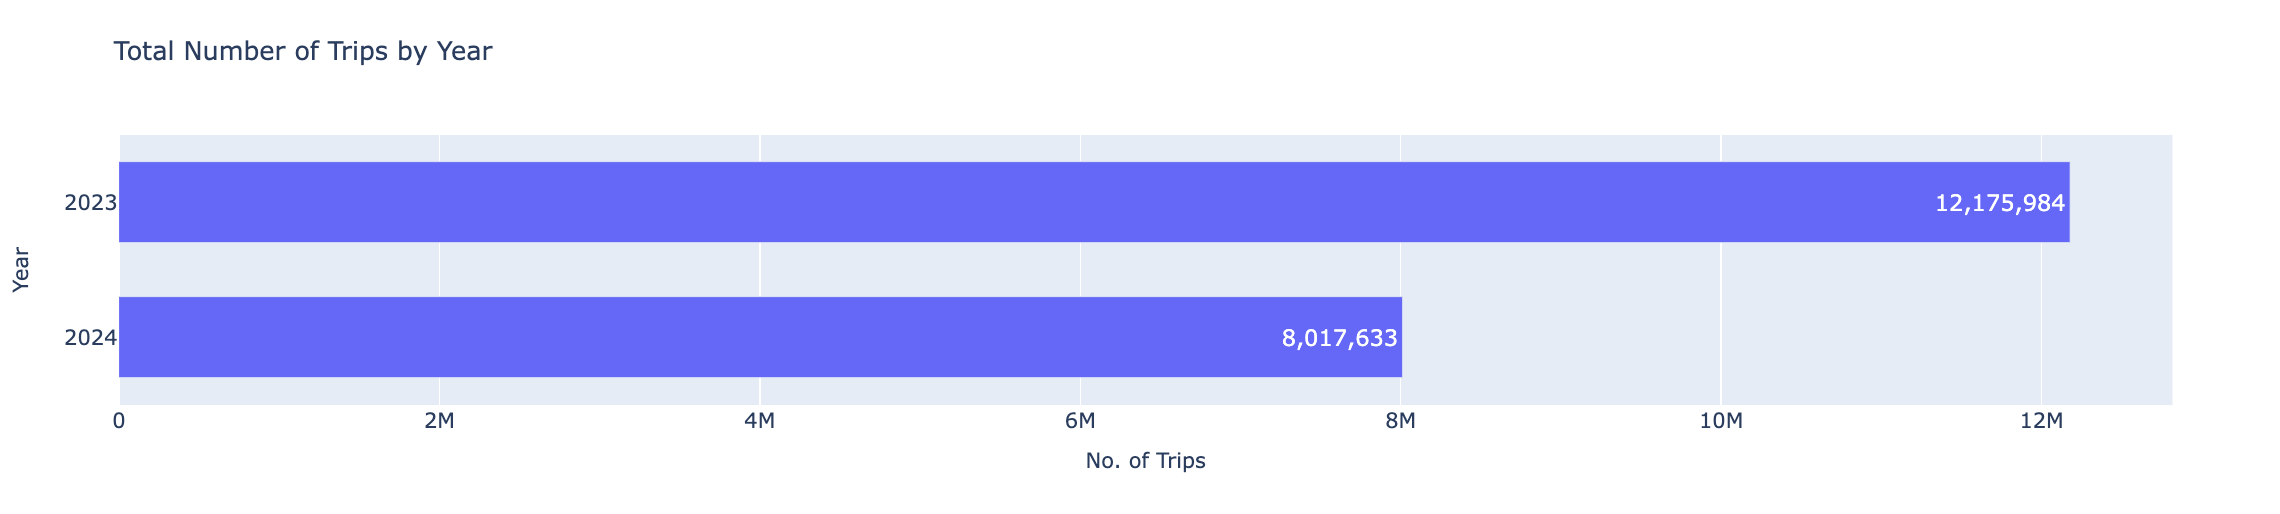

## 2023 recorded 12,175,984 trips
## As of the first five months of 2024, the total number of trips stands at 8,017,633. 
## This figure already represents a substantial portion of the previous year's total, indicating a strong start to the year and potentially setting the stage for another high year-end total.
## However, the final annual figure will depend on various factors, including seasonal travel patterns and any unforeseen disruptions.

In [149]:
# Aggregate trips by month
monthly_trips_2024 = combined_2024.groupby('Month').size()

# Filter out months with zero trips
monthly_trips_2024_non_zero = monthly_trips_2024[monthly_trips_2024 > 0]

# Calculate average monthly trips for 2024 using only non-zero months
avg_monthly_trips_2024 = monthly_trips_2024_non_zero.mean()

# Predict total trips for 2024
predicted_trips_2024 = avg_monthly_trips_2024 * 12

print(f"Predicted total trips for 2024 based on available data: {predicted_trips_2024:.0f}")

Predicted total trips for 2024 based on available data: 19242319


## I Calculated the average number of tips per month then extrapolated the average to estimate the total count for the rest of 2024
## 2024: 8,017,633 trips (as of the first five months, indicating a potential for approximately 19 million trips by year-end)

In [ ]:
# Filter trip_counts to include only data for 2024
trip_counts_2024 = trip_counts[trip_counts['Year'] == 2024]

# Calculate the difference between predicted and actual trips
actual_trips_2024 = trip_counts_2024['Trip_Count'].iloc[0]
predicted_trips_2024 = predicted_trips_2024

# Calculate the remaining trips needed to reach the predicted amount
remaining_trips = predicted_trips_2024 - actual_trips_2024

# Visualize the total number of trips for 2024 using Plotly
fig = go.Figure()

# Add blue bar for actual data
fig.add_trace(go.Bar(
    x=[actual_trips_2024],  # Actual trip count for 2024
    y=[2024],
    orientation='h',
    marker=dict(color='blue'),
    name='Actual',
    text=['{:,}'.format(actual_trips_2024)],  # Display actual count as text
    textposition='inside',
    textfont=dict(size=15, color='white'),
    width=0.4,  # Set width of blue bar
    offset=-0.2  # Offset to position the blue bar to the left of the red bar
))

# Add red bar for remaining trips to reach predicted total
fig.add_trace(go.Bar(
    x=[remaining_trips],  # Remaining trips to reach predicted total
    y=[2024],
    orientation='h',
    marker=dict(color='red'),
    name='Predicted',
    text=['{:,.0f}'.format(predicted_trips_2024)],  # Display predicted count without decimals as text
    textposition='inside',
    textfont=dict(size=15, color='white'),
    width=0.4,  # Set width of red bar
    offset=0.2,  # Offset to position the red bar to the right of the blue bar
    base=[actual_trips_2024]  # Align red bar with end of blue bar
))

# Add annotation above the red bar showing the remaining amount
fig.add_annotation(
    x=remaining_trips,  # X position of the annotation (remaining trips)
    y=2024,  # Y position of the annotation (year 2024)
    text="Remaining: {:,.0f}".format(remaining_trips),  # Annotation text showing remaining amount
    font=dict(color="black", size=14),
    align='center',  # Align annotation text to center
    xanchor='center',  # Anchor annotation horizontally to center
    yshift=20,  # Shift annotation upward by 20 pixels for better positioning
    ax=0,  # Remove the line pointing towards the bar
    ay=0   # Remove the line pointing towards the bar
)

# Update layout with axis titles, tick font sizes, and adjusted x-axis range
fig.update_layout(
    xaxis=dict(title='No. of Trips', tickfont=dict(size=16), range=[0, 25000000], title_font=dict(size=18)),  # Adjust range to reach up to 25 million
    yaxis=dict(title='Year', tickfont=dict(size=17), tickvals=[2024], autorange="reversed", title_font=dict(size=20)),
    title='Total Number of Trips for 2024 (Prediction)',
    bargap=0.1,  # Gap between bars of the same group
    bargroupgap=0.1  # Gap between bars of different groups
)

# Show the plot
fig.show()

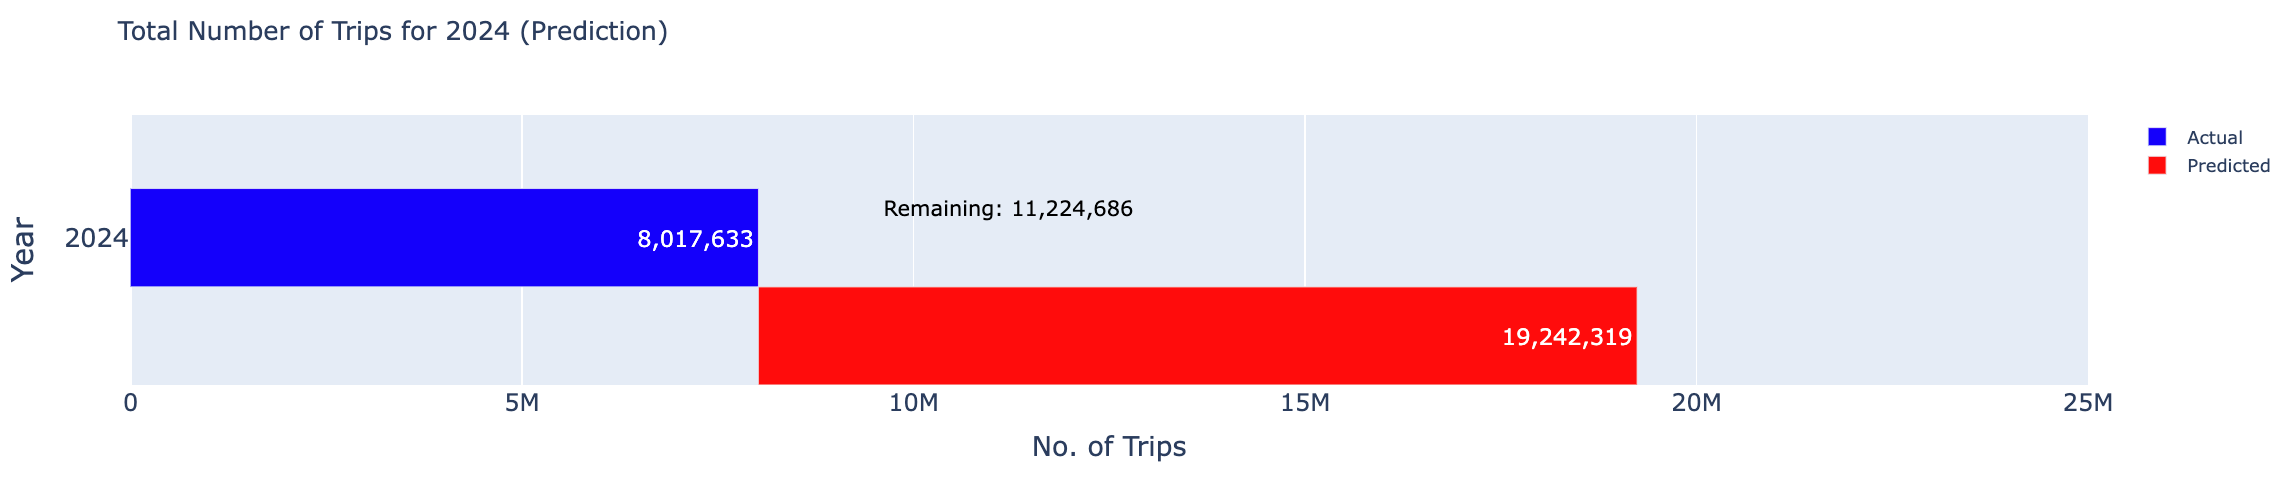

## A predicted count of 11.2 million trips remain for the rest of 2024 to reach 19.2 milllion trips

In [153]:
combined_2023[combined_2023['Year'] == 2023].groupby('Month').size().sort_values(ascending=False)

Month
11    1410571
10    1401682
12    1227423
9     1189622
8     1109161
6     1010009
7      999589
5      945120
3      817970
4      813510
2      664925
1      586402
dtype: int64

In [154]:
combined_2024[combined_2024['Year'] == 2024].groupby('Month').size().sort_values(ascending=False)

Month
4     1961673
3     1829568
2     1699372
1     1558113
5      968907
6           0
7           0
8           0
9           0
10          0
11          0
12          0
dtype: int64

In [ ]:
# Group by Month and count the number of trips for each month
monthly_trip_counts_2023 = combined_2023[combined_2023['Year'] == 2023].groupby('Month').size().reset_index(name='Trip_Count')

# Ensure the months are in the correct order
monthly_trip_counts_2023 = monthly_trip_counts_2023.sort_values(by='Month')

# Plotting the line chart using Plotly Express
fig = px.line(monthly_trip_counts_2023, 
              x='Month', 
              y='Trip_Count', 
              labels={'Month': 'Month', 'Trip_Count': 'Number of Trips'},
              title='Number of Trips per Month in 2023',
              markers=True)

# Update layout settings
fig.update_layout(
    xaxis=dict(title='Month', tickmode='linear', tick0=1, dtick=1, tickfont=dict(size=14)),
    yaxis=dict(title='Number of Trips', tickfont=dict(size=14)),
    title=dict(text='Number of Trips per Month in 2023', font_size=16),
    height=400  # Adjust the height as needed
)

# Show the plot
fig.show()

# Group by Month and count the number of trips for each month
monthly_trip_counts_2024 = combined_2024[combined_2024['Year'] == 2024].groupby('Month').size().reset_index(name='Trip_Count')

# Ensure the months are in the correct order
monthly_trip_counts_2024 = monthly_trip_counts_2024.sort_values(by='Month')

# Plotting the line chart using Plotly Express
fig = px.line(monthly_trip_counts_2024, 
              x='Month', 
              y='Trip_Count', 
              labels={'Month': 'Month', 'Trip_Count': 'Number of Trips'},
              title='Number of Trips per Month in 2024',
              markers=True)

# Update layout settings
fig.update_layout(
    xaxis=dict(title='Month', tickmode='linear', tick0=1, dtick=1, tickfont=dict(size=14)),
    yaxis=dict(title='Number of Trips', tickfont=dict(size=14)),
    title=dict(text='Number of Trips per Month in 2024', font_size=16),
    height=400  # Adjust the height as needed
)

# Show the plot
fig.show()

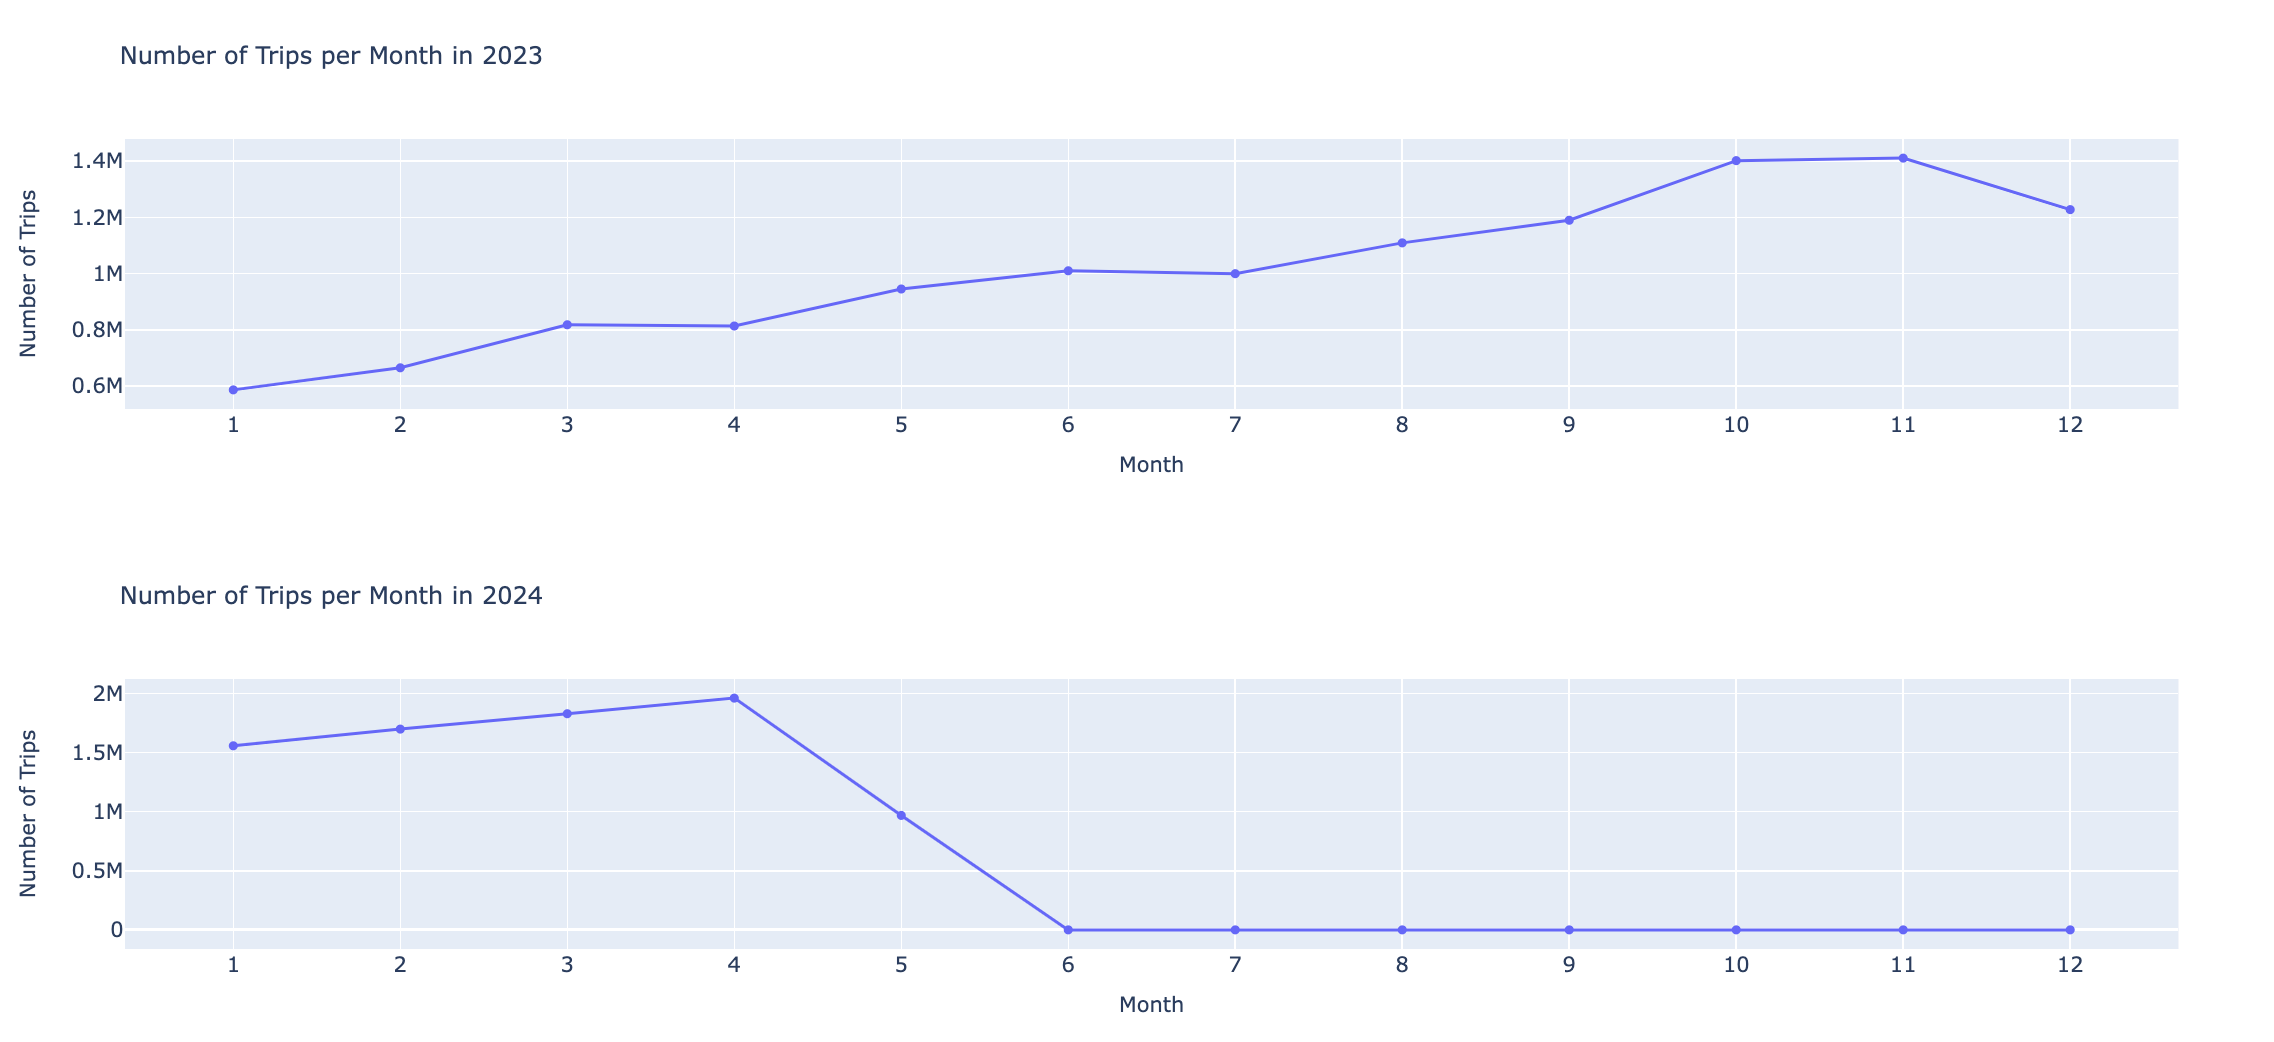

In [156]:
combined_2023_2024 = pd.concat([combined_2023, combined_2024], ignore_index=True)
combined_2023_2024.reset_index(drop=True, inplace=True)
combined_2023_2024

Gender  Age  Pickup_Station_ID Pickup_Date Pickup_Time  \
0             M   31                 16  2023-01-01    00:09:44   
1             M   35                 16  2023-01-01    00:10:00   
2             M   27                 19  2023-01-01    00:02:27   
3             M   41                261  2023-01-01    00:08:58   
4             M   34                132  2023-01-01    00:17:36   
...         ...  ...                ...         ...         ...   
20193612      M   29                277  2024-05-15    22:21:13   
20193613      M   59                596  2024-05-15    22:22:57   
20193614      M   33                 69  2024-05-15    22:01:17   
20193615      F   30                560  2024-05-15    22:16:41   
20193616      M   30                 74  2024-05-15    22:16:31   

          Return_Station_ID Return_Date Return_Time  Trip_Duration  Year  \
0                         2  2023-01-01    00:14:43            5.0  2023   
1                         2  2023-01-01    00:14:49            4.8  2023   
2                        76  2023-01-01    00:15:05           12.6  2023   
3                       212  2023-01-01    00:18:37            9.6  2023   
4                       127  2023-01-01    00:20:15            2.6  2023   
...                     ...         ...         ...            ...   ...   
20193612                151  2024-05-15    22:26:19            5.1  2024   
20193613                598  2024-05-15    22:26:20            3.4  2024   
20193614                352  2024-05-15    22:26:23           25.1  2024   
20193615                584  2024-05-15    22:26:24            9.7  2024   
20193616                190  2024-05-15    22:26:25            9.9  2024   

         Month   Week_Day  Hour  
0            1     Sunday     0  
1            1     Sunday     0  
2            1     Sunday     0  
3            1     Sunday     0  
4            1     Sunday     0  
...        ...        ...   ...  
20193612     5  Wednesday    22  
20193613     5  Wednesday    22  
20193614     5  Wednesday    22  
20193615     5  Wednesday    22  
20193616     5  Wednesday    22  

[20193617 rows x 13 columns]

In [ ]:
# Group by Year and Month and count the number of trips for each month
monthly_trip_counts = combined_2023_2024.groupby(['Year', 'Month']).size().reset_index(name='Trip_Count')

# Ensure the months are in the correct order for both years
monthly_trip_counts = monthly_trip_counts.sort_values(by=['Year', 'Month'])

# Plotting the line chart using Plotly Express
fig = px.line(
    monthly_trip_counts, 
    x='Month', 
    y='Trip_Count', 
    color='Year',  # Differentiate by year
    markers=True,  # Add markers for data points
    line_dash='Year',  # Different line styles for different years
    labels={'Month': 'Month', 'Trip_Count': 'Number of Trips'},
    title='Number of Trips per Month from January 2023 to April 2024'
)

# Update layout settings
fig.update_layout(
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],  # Month numbers
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],  # Month names
        tickfont=dict(size=14),
        range=[0.5, 12.5]  # To ensure all months are displayed from Jan to Dec
    ),
    yaxis=dict(title='Number of Trips', tickfont=dict(size=14)),
    title=dict(text='Number of Trips per Month from January 2023 to April 2024', font_size=16),
    height=400,  # Adjust the height as needed
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    legend_title=dict(text='Year', font_size=14),
)

# Show the plot
fig.show()

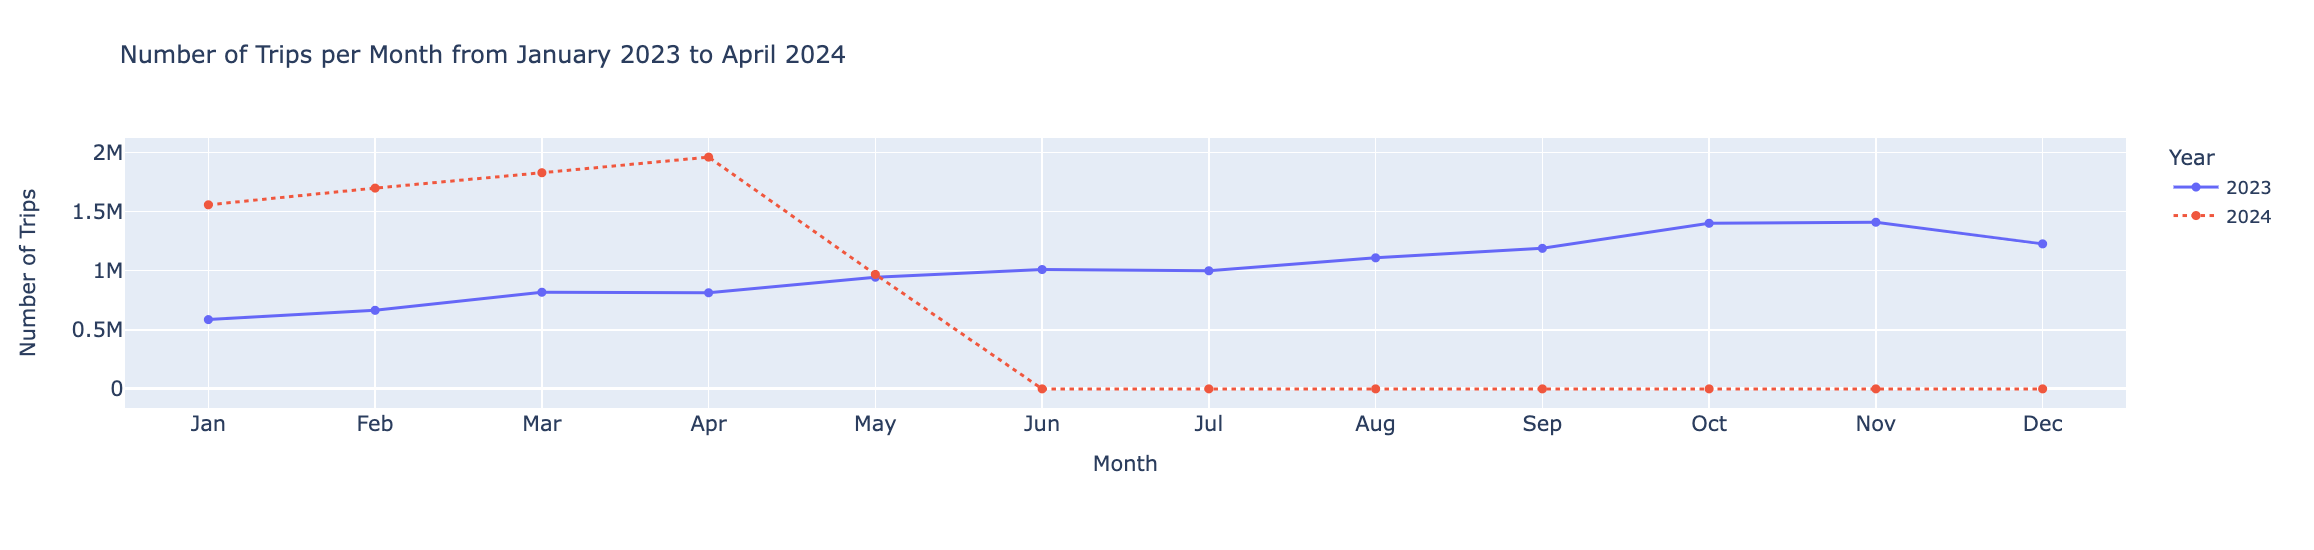

## Trip count has almost tripled from 2023 to 2024
## November had the highest recorded trip count for 2023 with 1,410,571 trips

In [159]:
combined_2023.groupby('Month')['Trip_Duration'].mean()

Month
1     16.850021
2     16.482455
3     15.996000
4     16.093561
5     15.335752
6     15.277820
7     15.386608
8     15.123144
9     15.433876
10    15.781071
11    15.651671
12    15.532792
Name: Trip_Duration, dtype: float64

In [160]:
combined_2024.groupby('Month')['Trip_Duration'].mean()

Month
1     15.364309
2     15.527503
3     15.795428
4     15.441573
5     15.161672
6           NaN
7           NaN
8           NaN
9           NaN
10          NaN
11          NaN
12          NaN
Name: Trip_Duration, dtype: float64

In [ ]:
# Plotting the average trip duration for 2023 and 2024 directly
fig = px.line(
    combined_2023_2024.groupby(['Year', 'Month'])['Trip_Duration'].mean().reset_index(),
    x='Month',
    y='Trip_Duration',
    color='Year',
    markers=True,
    labels={'Month': 'Month', 'Trip_Duration': 'Average Trip Duration (Minutes)', 'Year': 'Year'},
    title='Average Trip Duration per Month for 2023 and 2024',
    line_dash='Year'  # Different line styles for each year
)

# Update layout settings
fig.update_layout(
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
        tickfont=dict(size=14)
    ),
    yaxis=dict(
        title='Average Trip Duration (Minutes)',
        tickfont=dict(size=14)
    ),
    title=dict(text='Average Trip Duration per Month for 2023 and 2024', font_size=16),
    height=400  # Adjust the height as needed
)

# Show the plot
fig.show()

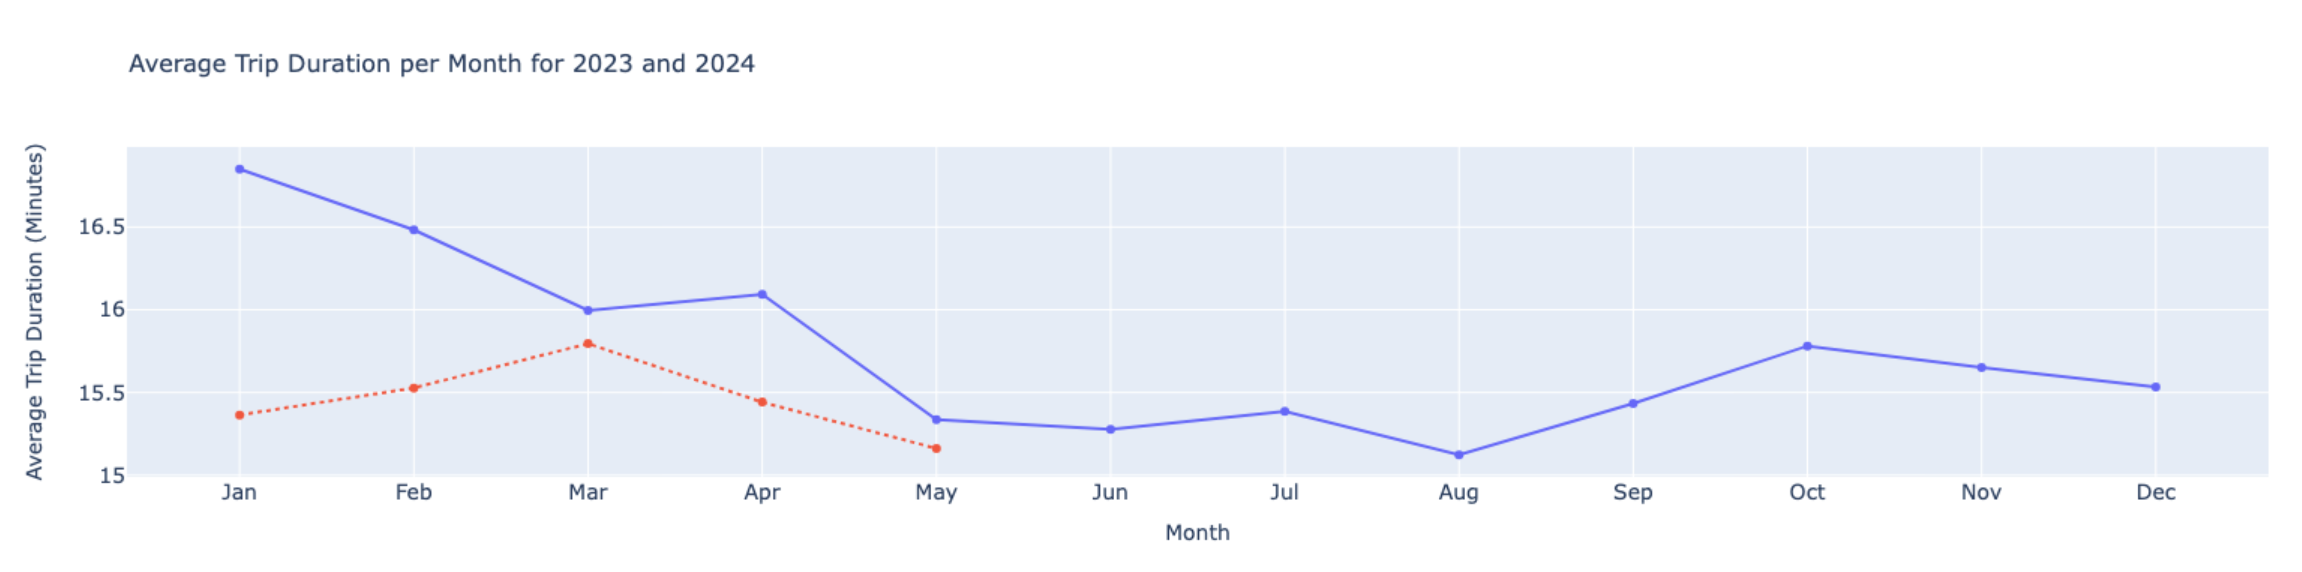

## 2023: The average trip duration fluctuated slightly throughout the year, with values ranging from 15.12 to 16.85 minutes. 
### The duration was highest in January at 16.85 minutes, and generally showed a mild decreasing trend as the year progressed, ending at 15.53 minutes in December.
## 2024: In the initial months of 2024, the average trip duration ranged from 15.16 to 15.80 minutes, showing a relatively stable pattern compared to the previous year. 
### The duration was highest in March at 15.80 minutes and lowest in May at 15.16 minutes.

In [163]:
# creating a 'Trip_ID' column for each trip in my dataframe
combined_2023_2024.insert(0, 'Trip_ID', combined_2023_2024.index)
combined_2023_2024

Trip_ID Gender  Age  Pickup_Station_ID Pickup_Date Pickup_Time  \
0                0      M   31                 16  2023-01-01    00:09:44   
1                1      M   35                 16  2023-01-01    00:10:00   
2                2      M   27                 19  2023-01-01    00:02:27   
3                3      M   41                261  2023-01-01    00:08:58   
4                4      M   34                132  2023-01-01    00:17:36   
...            ...    ...  ...                ...         ...         ...   
20193612  20193612      M   29                277  2024-05-15    22:21:13   
20193613  20193613      M   59                596  2024-05-15    22:22:57   
20193614  20193614      M   33                 69  2024-05-15    22:01:17   
20193615  20193615      F   30                560  2024-05-15    22:16:41   
20193616  20193616      M   30                 74  2024-05-15    22:16:31   

          Return_Station_ID Return_Date Return_Time  Trip_Duration  Year  \
0                         2  2023-01-01    00:14:43            5.0  2023   
1                         2  2023-01-01    00:14:49            4.8  2023   
2                        76  2023-01-01    00:15:05           12.6  2023   
3                       212  2023-01-01    00:18:37            9.6  2023   
4                       127  2023-01-01    00:20:15            2.6  2023   
...                     ...         ...         ...            ...   ...   
20193612                151  2024-05-15    22:26:19            5.1  2024   
20193613                598  2024-05-15    22:26:20            3.4  2024   
20193614                352  2024-05-15    22:26:23           25.1  2024   
20193615                584  2024-05-15    22:26:24            9.7  2024   
20193616                190  2024-05-15    22:26:25            9.9  2024   

         Month   Week_Day  Hour  
0            1     Sunday     0  
1            1     Sunday     0  
2            1     Sunday     0  
3            1     Sunday     0  
4            1     Sunday     0  
...        ...        ...   ...  
20193612     5  Wednesday    22  
20193613     5  Wednesday    22  
20193614     5  Wednesday    22  
20193615     5  Wednesday    22  
20193616     5  Wednesday    22  

[20193617 rows x 14 columns]

In [ ]:
# Group by Year and Month to get the monthly data for 2023 and 2024
monthly_summary = combined_2023_2024.groupby(['Year', 'Month']).agg(
    Trip_Count=('Trip_ID', 'count'),
    Avg_Trip_Duration=('Trip_Duration', 'mean')
).reset_index()

# Create the Month-Year column for x-axis labels
monthly_summary['Month_Year'] = monthly_summary['Month'].astype(str) + '-' + monthly_summary['Year'].astype(str)

# Filter the data to include only up to May 2024
filtered_summary = monthly_summary[(monthly_summary['Year'] == 2023) | 
                                   ((monthly_summary['Year'] == 2024) & (monthly_summary['Month'] <= 5))]

# Create the bar chart for Number of Trips and line chart for Average Trip Duration
fig = go.Figure()

# Add bar trace for the Number of Trips
fig.add_trace(go.Bar(
    x=filtered_summary['Month_Year'],  # Month-Year as x-axis
    y=filtered_summary['Trip_Count'],
    name='Number of Trips',
    marker=dict(color='skyblue'),
    text=filtered_summary['Trip_Count'],
    textposition='inside'
))

# Add line trace for Average Trip Duration
fig.add_trace(go.Scatter(
    x=filtered_summary['Month_Year'],  # Month-Year as x-axis
    y=filtered_summary['Avg_Trip_Duration'],
    name='Avg Trip Duration (Minutes)',
    mode='lines+markers',
    line=dict(color='orange', width=2),
    marker=dict(size=8, color='orange'),
    yaxis='y2',
    text=filtered_summary['Avg_Trip_Duration'],
    textposition='top center'
))

# Update layout settings
fig.update_layout(
    xaxis=dict(
        title='Month-Year',
        title_font=dict(size=14),
        tickfont=dict(size=12),
        tickangle=-45,  # Tilt the x-axis labels for better readability
        range=[filtered_summary['Month_Year'].iloc[0], filtered_summary['Month_Year'].iloc[-1]]  # Set the x-axis range
    ),
    yaxis=dict(
        title='Number of Trips',
        title_font=dict(size=14),
        tickfont=dict(size=12),
        title_standoff=20  # Space between y-axis title and axis
    ),
    yaxis2=dict(
        title='Avg Trip Duration (Minutes)',
        title_font=dict(size=14),
        tickfont=dict(size=12),
        overlaying='y',
        side='right'
    ),
    title=dict(
        text='Number of Trips and Average Trip Duration per Month (Jan 2023 - May 2024)',
        font_size=16
    ),
    height=600,  # Adjust the height as needed
    xaxis_title='Month-Year',
    yaxis_title='Number of Trips',
    yaxis2_title='Avg Trip Duration (Minutes)',
    legend=dict(
        yanchor="top",
        y=1,  # Adjust the y value to move the legend up
        xanchor="right",
        x=0.99  # Position legend on the right side
    )
)

# Show the plot
fig.show()

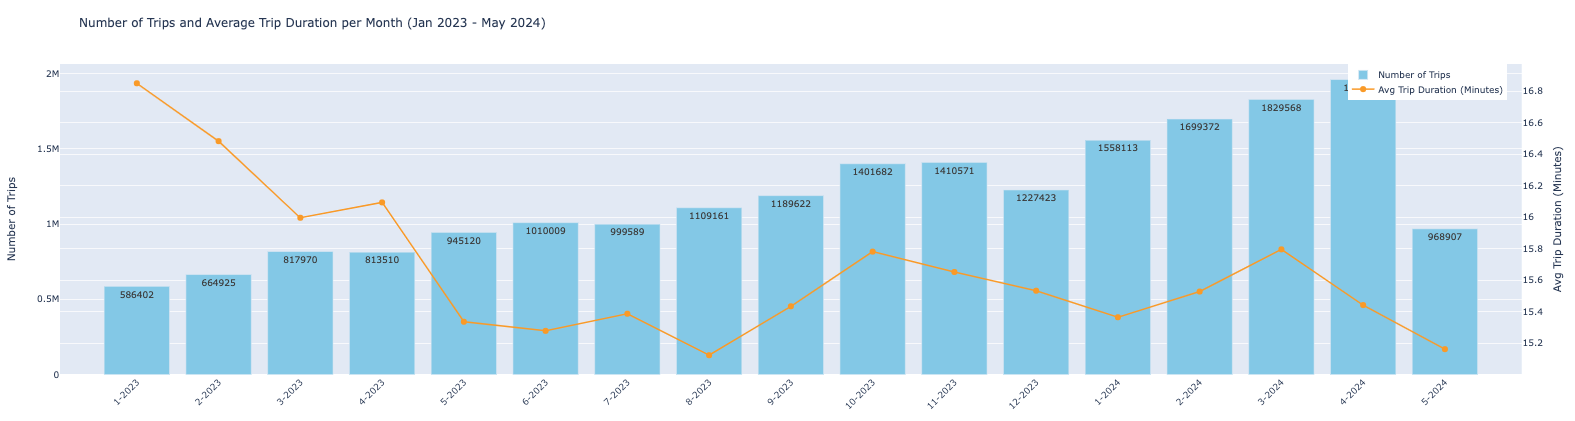

In [165]:
# Calculate the correlation coefficient
correlation_coefficient = monthly_summary['Trip_Count'].corr(monthly_summary['Avg_Trip_Duration'])
print(f'Correlation Coefficient between Trip Count and Average Trip Duration: {correlation_coefficient:.2f}')

Correlation Coefficient between Trip Count and Average Trip Duration: -0.44


## Negative correlation between trip count and avg trip duration
## As Trip count icreases, trip duration decreases
## Between August and march 2024, trip duration and trip count show similar behavior

In [167]:
combined_2023.groupby('Week_Day').size().sort_values(ascending=False)

Week_Day
Wednesday    2013339
Tuesday      1996146
Thursday     1987335
Friday       1921283
Monday       1792336
Saturday     1237568
Sunday       1227977
dtype: int64

In [168]:
combined_2024.groupby('Week_Day').size().sort_values(ascending=False)

Week_Day
Tuesday      1389841
Wednesday    1364915
Thursday     1297845
Friday       1211790
Monday       1198547
Saturday      791794
Sunday        762901
dtype: int64

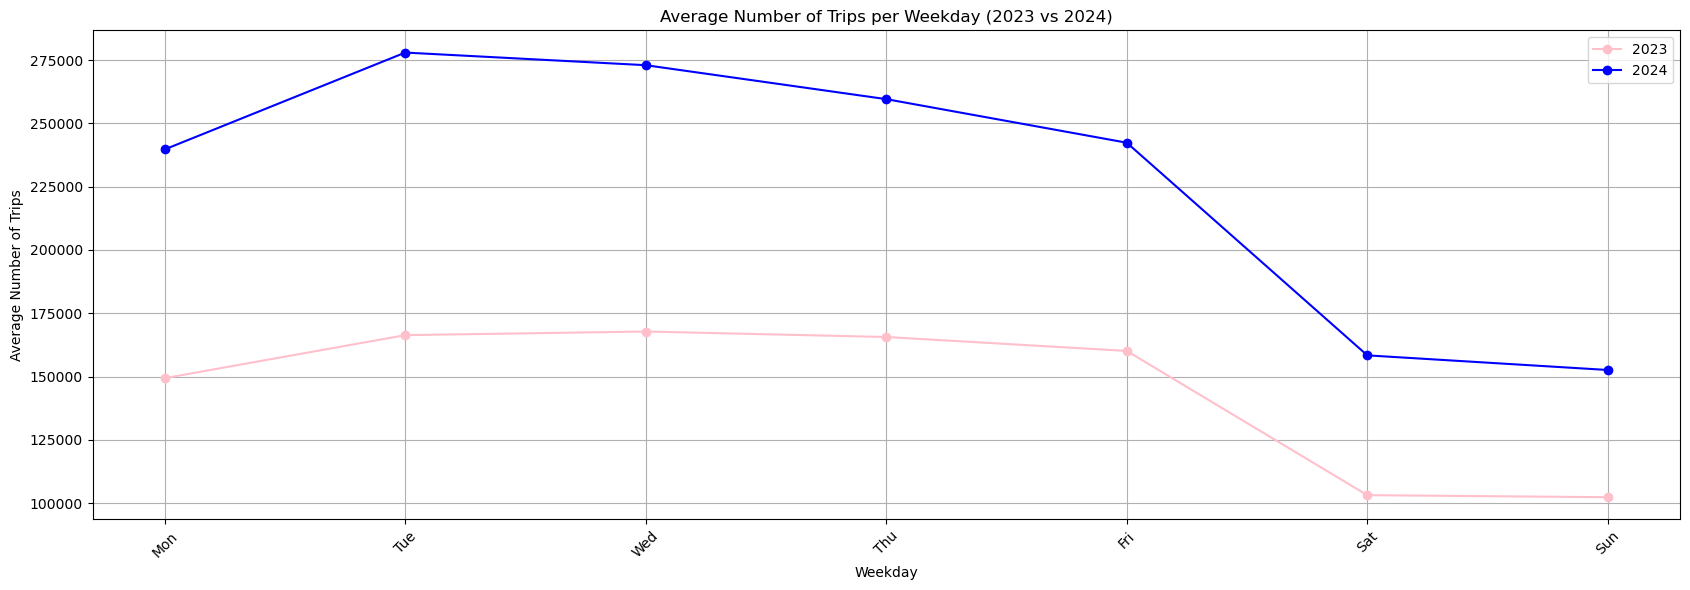

In [169]:
# Group and sort the data by Week_Day for each year
weekday_counts_2023 = combined_2023.groupby('Week_Day').size()
weekday_counts_2024 = combined_2024.groupby('Week_Day').size()

# Calculate average trips per weekday for all available months
avg_weekday_counts_2023 = weekday_counts_2023 / len(combined_2023['Month'].unique())
avg_weekday_counts_2024 = weekday_counts_2024 / len(combined_2024['Month'].unique())

# Define the tick positions and labels for the weekdays
tick_positions = range(7)  # Weekdays from 0 to 6
tick_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']  # Weekday labels

# Plotting the data
plt.figure(figsize=(17, 6))

# Plot average trips for each weekday
plt.plot(tick_positions, avg_weekday_counts_2023, marker='o', linestyle='-', color='pink', label='2023')
plt.plot(tick_positions, avg_weekday_counts_2024, marker='o', linestyle='-', color='blue', label='2024')

# Set the title and labels
plt.title('Average Number of Trips per Weekday (2023 vs 2024)')
plt.xlabel('Weekday')
plt.ylabel('Average Number of Trips')

# Set the tick positions and labels
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

# Show grid, legend, and layout
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

## Overall increase of trip counts daily from 2023-2024 
### 2024 recorded a significant peak on tuesday with a strong decrease through out the week
## While 2023 shows a gradual decreasse from tuesday to friday
### Weekends display significantly lower amounts of trips
### Less people ride bikes on the weekends, like due to no work commuting on weekends

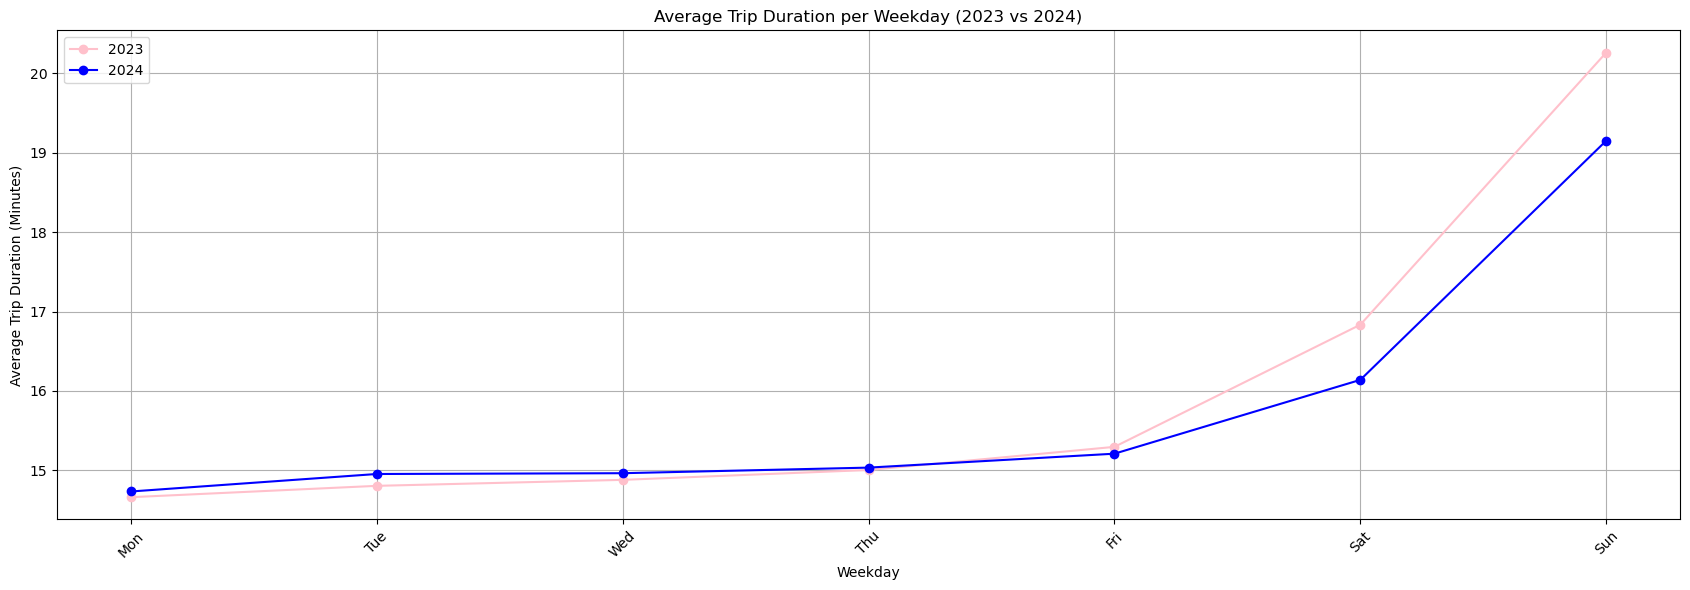

In [171]:
# Calculate average trip duration per weekday
avg_duration_2023 = combined_2023.groupby('Week_Day')['Trip_Duration'].mean()
avg_duration_2024 = combined_2024.groupby('Week_Day')['Trip_Duration'].mean()

# Define the tick positions and labels for the weekdays
tick_positions = range(7)  # Weekdays from 0 to 6
tick_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']  # Weekday labels

# Plotting the data
plt.figure(figsize=(17, 6))

# Plot average trip duration for each weekday
plt.plot(tick_positions, avg_duration_2023, marker='o', linestyle='-', color='pink', label='2023')
plt.plot(tick_positions, avg_duration_2024, marker='o', linestyle='-', color='blue', label='2024')

# Set the title and labels
plt.title('Average Trip Duration per Weekday (2023 vs 2024)')
plt.xlabel('Weekday')
plt.ylabel('Average Trip Duration (Minutes)')

# Set the tick positions and labels
plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)

# Show grid, legend, and layout
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Average trip duration was slightly higher from monday - thursday for 2023
### 2024 shows a higher average trip duration from friday - sunday
### Trip duration is higher during weekends
### While trip counts are at the lowest during weekends but trip duration at its highest, this show trends and beheavior linked to work commutes during the work week leisure time (bike rides) during weekends
### Mexico city has many main roads that are closed to just cycling on sunday which can show why there are also higher trip durations on the sunday than any other day of the week 

## 2023 vs 2024: 
### The average trip duration was slightly higher from Monday to Thursday in 2023 compared to the same days in 2024. 
### Conversely, in 2024, there is a noticeable increase in the average trip duration from Friday to Sunday.
### Weekend Effect: The data reveals that average trip durations are significantly higher during the weekends compared to weekdays. 
### Specifically, average trip duration peaks on Sundays, a trend not as pronounced in 2024 as it is in 2023.
### Weekday vs Weekend Commuting: The observed pattern suggests that trip durations are longer during weekends. This is likely due to the nature of weekend activities compared to the work week. 
### During weekdays, trips are likely driven by commuting needs, which often involve more direct routes. In contrast, weekends may encourage leisure activities that include longer bike rides.
### Special Cycling Roads: In Mexico City, many main roads are closed to motor traffic on Sundays to accommodate cycling, which likely contributes to longer bike rides and increased trip durations. 
### This infrastructure supports recreational cycling, contributing to the observed increase in trip durations on Sundays.

In [174]:
# Filter data for months from January to May
filtered_data = combined_2023_2024[combined_2023_2024['Month'].isin([1, 2, 3, 4, 5])]
filtered_data.groupby(['Year', 'Hour']).size().reset_index(name='Trip Count')

Year  Hour  Trip Count
0   2023     0       21110
1   2023     1        2720
2   2023     5       16934
3   2023     6       65267
4   2023     7      160192
5   2023     8      265508
6   2023     9      240221
7   2023    10      200669
8   2023    11      193694
9   2023    12      207060
10  2023    13      234904
11  2023    14      272646
12  2023    15      276766
13  2023    16      255798
14  2023    17      288173
15  2023    18      335058
16  2023    19      288176
17  2023    20      205859
18  2023    21      143666
19  2023    22       95765
20  2023    23       57741
21  2024     0       31003
22  2024     4           4
23  2024     5       52087
24  2024     6      193467
25  2024     7      421978
26  2024     8      605274
27  2024     9      462755
28  2024    10      385743
29  2024    11      376993
30  2024    12      403401
31  2024    13      469564
32  2024    14      551298
33  2024    15      561083
34  2024    16      522166
35  2024    17      632858
36  2024    18      738808
37  2024    19      578692
38  2024    20      414404
39  2024    21      303390
40  2024    22      198308
41  2024    23      114357

In [ ]:
# Filter data for months from January to May
filtered_data = combined_2023_2024[combined_2023_2024['Month'].isin([1, 2, 3, 4, 5])]

# Group by 'Year' and 'Hour' to count the number of trips
trip_count_by_hour_year = filtered_data.groupby(['Year', 'Hour']).size().reset_index(name='Trip Count')

# Create a line plot using Plotly Express for both years
fig = px.line(trip_count_by_hour_year, x='Hour', y='Trip Count', color='Year', 
              title='Number of Trips by Hour (January to May 2023 vs 2024)',
              labels={'Hour': 'Hour of the Day', 'Trip Count': 'Number of Trips'},
              color_discrete_map={2023: 'pink', 2024: 'blue'},  # Set colors for each year
              markers=True)  # Add markers to the lines

# Ensure all hours are shown on the x-axis
fig.update_xaxes(dtick=1)

# Customize the layout
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    height=600  # Set the desired height
)

# Show the plot
fig.show()


# Filter data for months from January to May and for weekends
filtered_weekend_data = combined_2023_2024[
    (combined_2023_2024['Month'].isin([1, 2, 3, 4, 5])) & 
    (combined_2023_2024['Week_Day'].isin(['Saturday', 'Sunday']))
]

# Group by 'Year' and 'Hour' to count the number of trips
trip_count_by_hour_year = filtered_weekend_data.groupby(['Year', 'Hour']).size().reset_index(name='Trip Count')

# Create a line plot using Plotly Express for both years
fig = px.line(trip_count_by_hour_year, x='Hour', y='Trip Count', color='Year', 
              title='Number of Trips by Hour for Weekends (January to May 2023 vs 2024)',
              labels={'Hour': 'Hour of the Day', 'Trip Count': 'Number of Trips'},
              color_discrete_map={2023: 'pink', 2024: 'blue'},  # Set colors for each year
              markers=True)  # Add markers to the lines

# Ensure all hours are shown on the x-axis
fig.update_xaxes(dtick=1)

# Customize the layout
fig.update_layout(
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12,
    height=600  # Set the desired height
)

# Show the plot
fig.show()


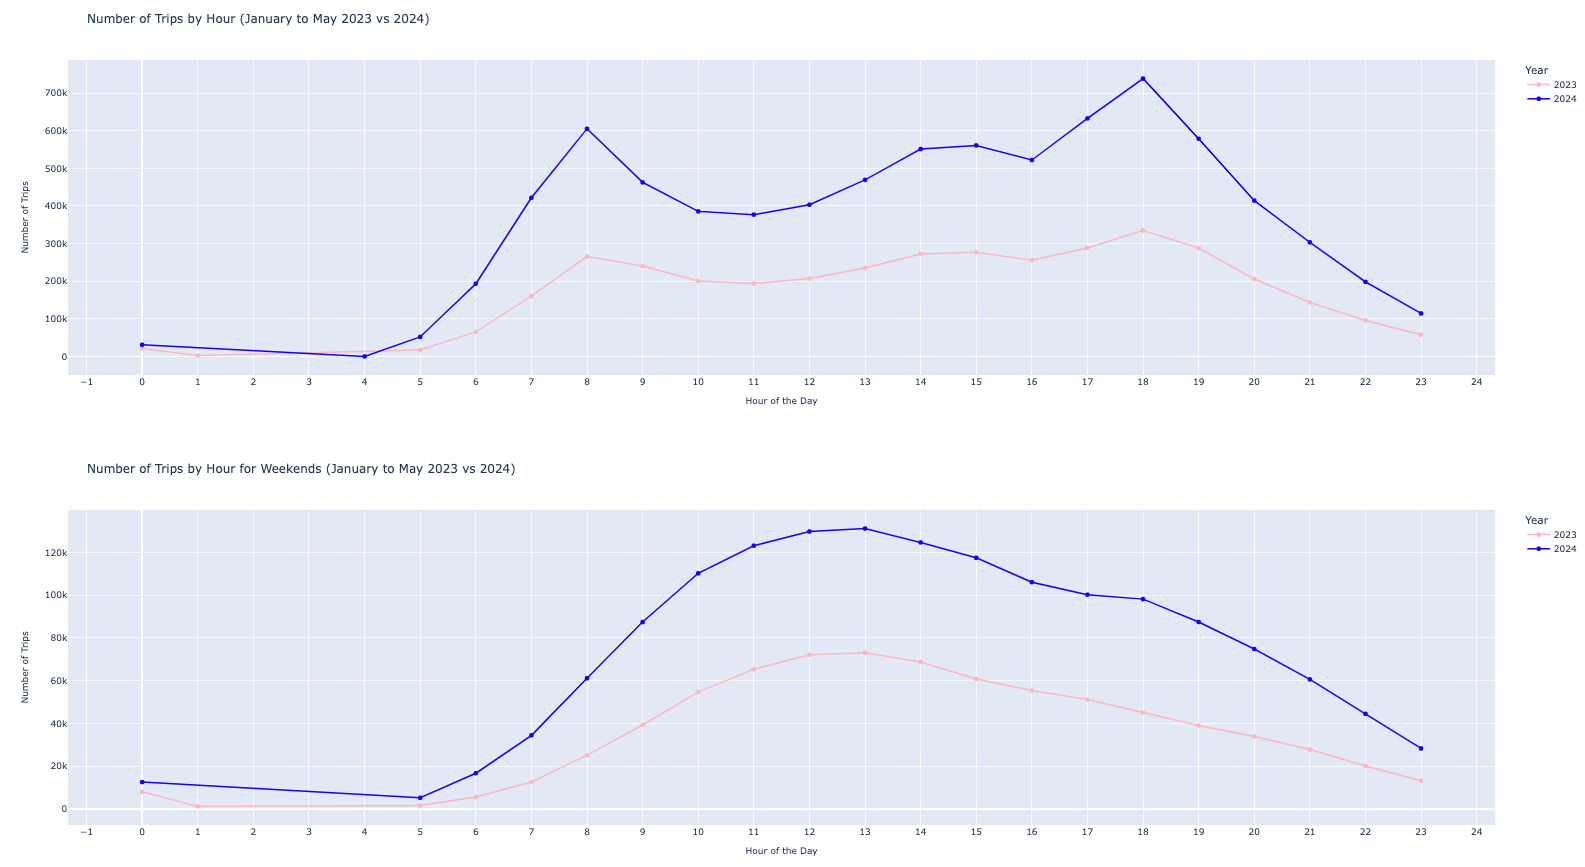

## 2023 Trends:
### Peak Hour: 
* The highest number of trips occurs at 18:00 with 335,058 trips.
### Low Hours: 
* The lowest number of trips occurs at 1:00 with 2,720 trips.
### Typical Workday Pattern: 
* The data shows a clear peak during the late afternoon and early evening hours, likely reflecting the end of the workday and increased travel.
## 2024 Trends: 
### Peak Hour: 
* The highest number of trips occurs at 18:00 with 738,808 trips.
### Low Hours: 
* The lowest number of trips occurs at 4:00 with just 4 trips.
### Increased Overall Activity: 
* There is a significant increase in the number of trips compared to 2023, particularly noticeable during peak hours like 18:00.
## Overall: 2024 shows a significant increase in the total number of trips across almost all hours compared to 2023.
## Example: The number of trips at 8:00 increased from 265,508 in 2023 to 605,274 in 2024, a substantial rise.
## The fluctuations in trip count by hour reflect morning commute to work, lunch time break and end of work hours 

## Weekend data shows that trip activity starts at 5am and increases until 13:00 
## A gradual decrease after 13:00
## Weekend behavior demonstrates people use bikes more and more while the day progresses with the peak usage at 13:00

In [178]:
combined_2023.groupby('Hour').agg(
    Trip_Count=('Trip_Duration', 'size'),
    Avg_Trip_Duration=('Trip_Duration', 'mean')
).reset_index()

Hour  Trip_Count  Avg_Trip_Duration
0      0       53770          16.037179
1      1        2720          16.784963
2      5       72667          10.975638
3      6      264415          11.779417
4      7      592614          13.451672
5      8      915787          14.160665
6      9      750498          14.414845
7     10      621213          15.827062
8     11      607956          16.878203
9     12      654772          17.156845
10    13      754359          16.413127
11    14      876916          15.667749
12    15      881046          15.635730
13    16      802640          15.808747
14    17      908396          16.424099
15    18     1065647          17.001017
16    19      864562          16.604825
17    20      605059          15.875097
18    21      426932          15.349647
19    22      282090          14.788442
20    23      171925          14.578293

In [ ]:
# Calculate the average trip duration and trip count by hour for 2018
trip_stats_2023 = combined_2023.groupby('Hour').agg(
    Trip_Count=('Trip_Duration', 'size'),
    Avg_Trip_Duration=('Trip_Duration', 'mean')
).reset_index()

# Filter out the data point for hour 12
trip_stats_2023_filtered = trip_stats_2023[trip_stats_2023['Hour'] != 4]

# Create a line plot for average trip duration by hour using Plotly Express
fig = px.line(
    trip_stats_2023_filtered, 
    x='Hour', 
    y='Avg_Trip_Duration', 
    title='Average Trip Duration by Hour for 2023',
    labels={'Hour': 'Hour of the Day', 'Avg_Trip_Duration': 'Average Trip Duration (minutes)'},
    markers=True
)

# Update the layout to make the graph more readable
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),  # Ensure all hours are shown on the x-axis
    height=500,  # Adjust height as needed
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

# Show the plot
fig.show()

# Calculate the average trip duration and trip count by hour for 2018
trip_stats_2024 = combined_2024.groupby('Hour').agg(
    Trip_Count=('Trip_Duration', 'size'),
    Avg_Trip_Duration=('Trip_Duration', 'mean')
).reset_index()

# Filter out the data point for hour 12
trip_stats_2024_filtered = trip_stats_2024[trip_stats_2024['Hour'] != 4]

# Create a line plot for average trip duration by hour using Plotly Express
fig = px.line(
    trip_stats_2024_filtered, 
    x='Hour', 
    y='Avg_Trip_Duration', 
    title='Average Trip Duration by Hour for 2024',
    labels={'Hour': 'Hour of the Day', 'Avg_Trip_Duration': 'Average Trip Duration (minutes)'},
    markers=True
)

# Update the layout to make the graph more readable
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),  # Ensure all hours are shown on the x-axis
    height=500,  # Adjust height as needed
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

# Show the plot
fig.show()

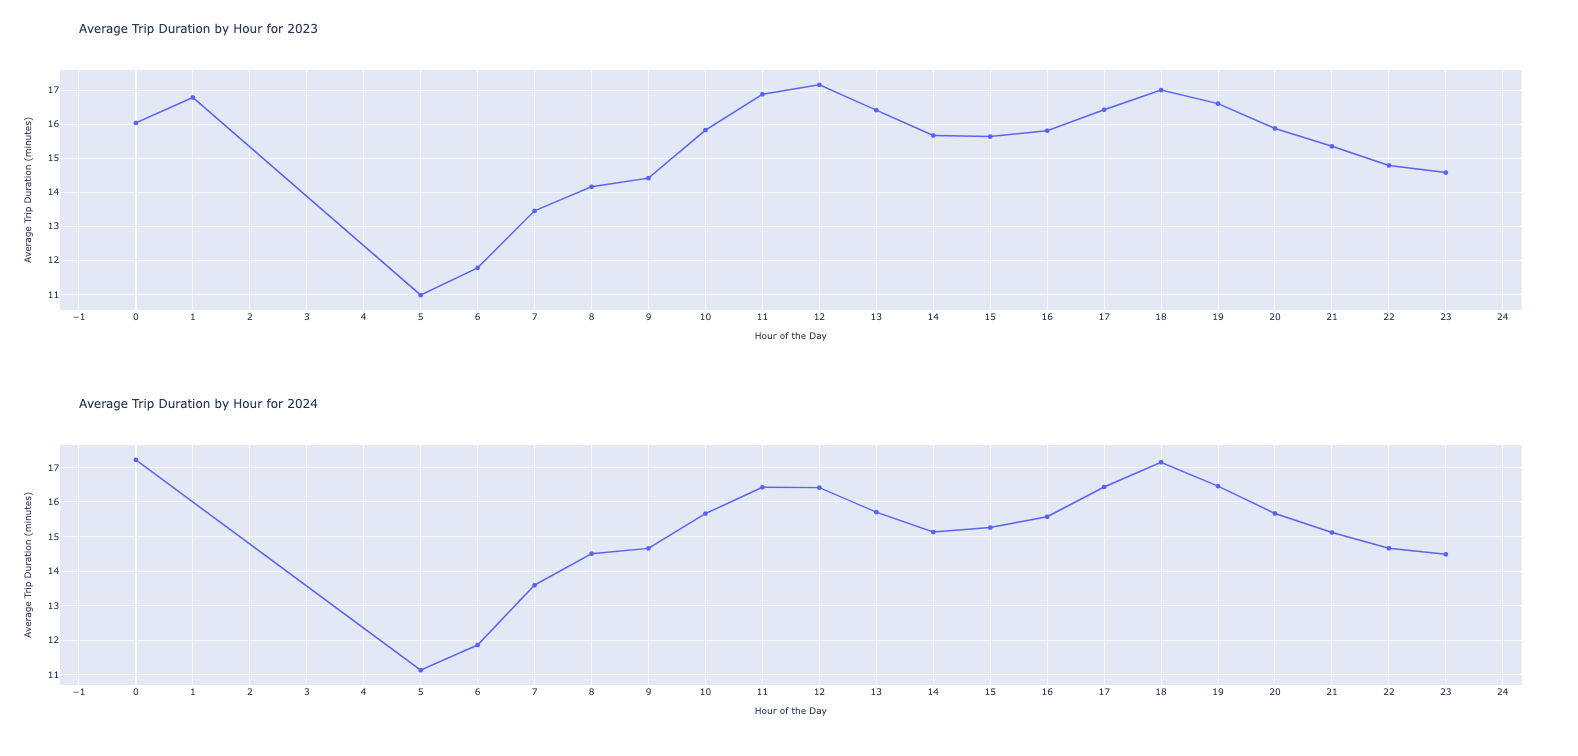

## Avg trip duration by hour shows very similar behavior for both years
## Midnight recorded the highest avg trip duration for 2024
## While 2023 recorded the highest avg trip duration at Noon

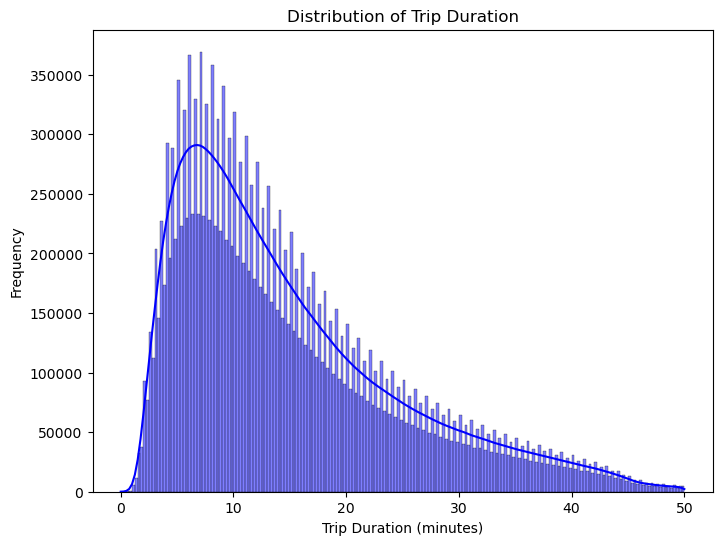

In [181]:
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_2023_2024[(combined_2023_2024['Trip_Duration'] >= 0) & (combined_2023_2024['Trip_Duration'] <= 50)], x='Trip_Duration', bins = 200, kde = True, color = 'blue')
plt.title('Distribution of Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

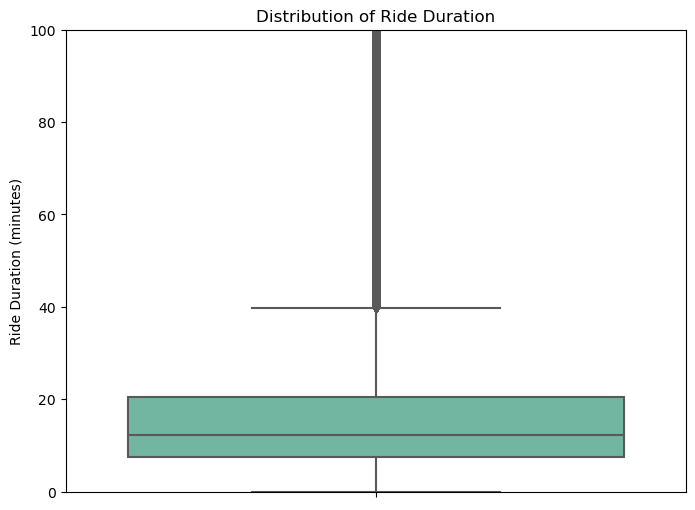

In [182]:
# Create a boxplot for 'Trip_Duration'
plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_2023_2024, y='Trip_Duration', palette='Set2')
plt.title('Distribution of Ride Duration')
plt.ylabel('Ride Duration (minutes)')

# Set y-axis limits to zoom in
plt.ylim(0, 100)  # Adjust the limits as needed

# Show the boxplot
plt.show()

## Distribution of trip duration is centered around 10 min with the most being under 20 min

# Moving on to demographics

In [185]:
combined_2023_2024.groupby(['Year', 'Gender']).size().reset_index(name='Counts')

Year Gender   Counts
0  2023      F  3495272
1  2023      M  8680712
2  2024      F  2399051
3  2024      M  5618582

In [ ]:
# Group by 'Year' and 'Gender' to get the count of each gender for each year
gender_counts = combined_2023_2024.groupby(['Year', 'Gender']).size().reset_index(name='Count')

# Create a pie chart using Plotly Express with facet wrapping by year
fig = px.pie(gender_counts, values='Count', names='Gender', color='Gender', 
             facet_col='Year', 
             title='Gender Distribution of Users 2023 and 2024', 
             color_discrete_sequence=['pink', 'blue'])

# Customize the layout
fig.update_layout(
    title_font_size=18,
    height=600  # Set the desired height
)

for annotation in fig.layout.annotations:
    annotation.text = annotation.text.split('=')[-1]
    annotation.update(font=dict(size=18))

    
# Show the plot
fig.show()

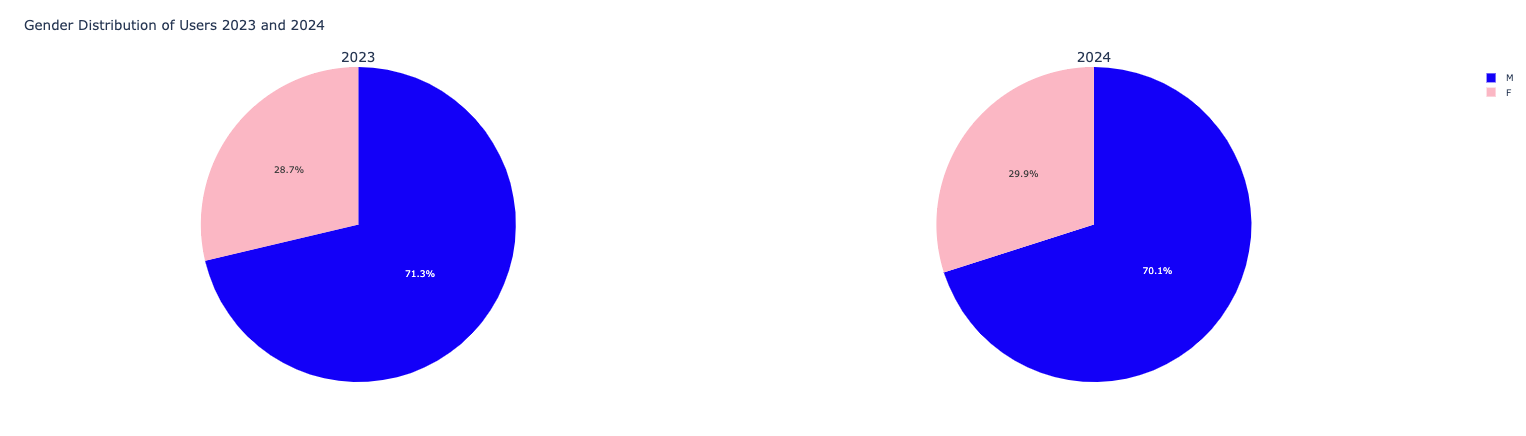

###  A slight increase in female usage from 2023 to 2024
### Males dominate bike usuge by 70% as of 2024

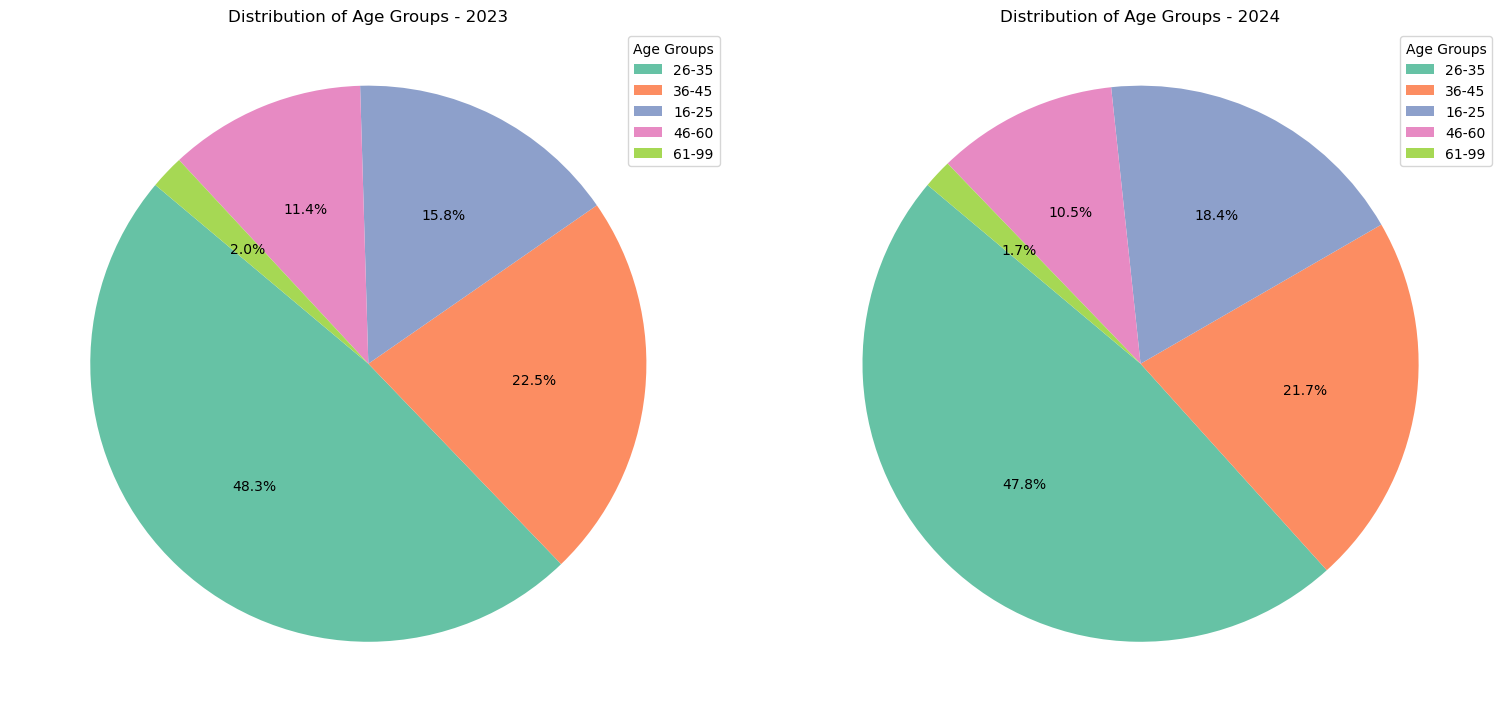

In [188]:
# Define the age ranges
age_ranges = [(16, 25), (26, 35), (36, 45), (46, 60), (61, 99)]
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']  # Custom color palette

# Function to categorize age into the specified ranges
def categorize_age(age):
    for lower, upper in age_ranges:
        if lower <= age <= upper:
            return f'{lower}-{upper}'
    return 'Unknown'

# Ensure 'Age_Group' column is created
combined_2023_2024['Age_Group'] = combined_2023_2024['Age'].apply(categorize_age)

# Filter the data for 2023 and 2024
data_2023 = combined_2023_2024[combined_2023_2024['Year'] == 2023]
data_2024 = combined_2023_2024[combined_2023_2024['Year'] == 2024]

# Get the age group counts for each year
age_group_counts_2023 = data_2023['Age_Group'].value_counts()
age_group_counts_2024 = data_2024['Age_Group'].value_counts()

# Define the pie chart colors
colors = sns.color_palette('Set2', n_colors=len(age_group_counts_2023.index))

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for 2023
axes[0].pie(age_group_counts_2023, autopct='%1.1f%%', startangle=140, colors=colors)
axes[0].set_title('Distribution of Age Groups - 2023')
axes[0].legend(age_group_counts_2023.index, title='Age Groups', loc='upper right')

# Pie chart for 2024
axes[1].pie(age_group_counts_2024, autopct='%1.1f%%', startangle=140, colors=colors)
axes[1].set_title('Distribution of Age Groups - 2024')
axes[1].legend(age_group_counts_2024.index, title='Age Groups', loc='upper right')

# Set equal aspect ratio
for ax in axes:
    ax.axis('equal')

# Adjust layout to reduce the space between the pie charts
plt.tight_layout(pad=4)

# Show the plot
plt.show()

### Age range 26-35 consists of majority of riders for both years
### Biggest increase was for age range 16-26 from 15.8% in 2023 to 18.4% for 2024

In [190]:
combined_2023_2024.groupby(['Year', 'Month', 'Gender'])['Trip_ID'].count().reset_index(name='Trip Count').head(5)

Year Month Gender  Trip Count
0  2023     1      F      151249
1  2023     1      M      435153
2  2023     2      F      177843
3  2023     2      M      487082
4  2023     3      F      218855

In [ ]:
# Group by 'Year', 'Month', and 'Gender' to calculate the average trip count for each month
avg_trip_count_by_gender_month = combined_2023_2024.groupby(['Year', 'Month', 'Gender'])['Trip_ID'].count().reset_index(name='Trip Count')

# Calculate the average trip count for each month and gender
avg_trip_count_by_gender_month = avg_trip_count_by_gender_month.groupby(['Year', 'Month', 'Gender'])['Trip Count'].mean().reset_index()

# Create a line chart using Plotly Express with month on the x-axis
fig = px.line(avg_trip_count_by_gender_month, x='Month', y='Trip Count', color='Gender', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Monthly Trip Count for Males and Females (2023 vs 2024)',
              labels={'Month': 'Month', 'Trip Count': 'Average Trip Count'},
              color_discrete_map={'Male': 'blue', 'Female': 'pink'},  # Set colors for each gender
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Month',
    yaxis_title='Average Trip Count'
)

# Update x-axis ticks to show month names
fig.update_xaxes(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
fig.show()

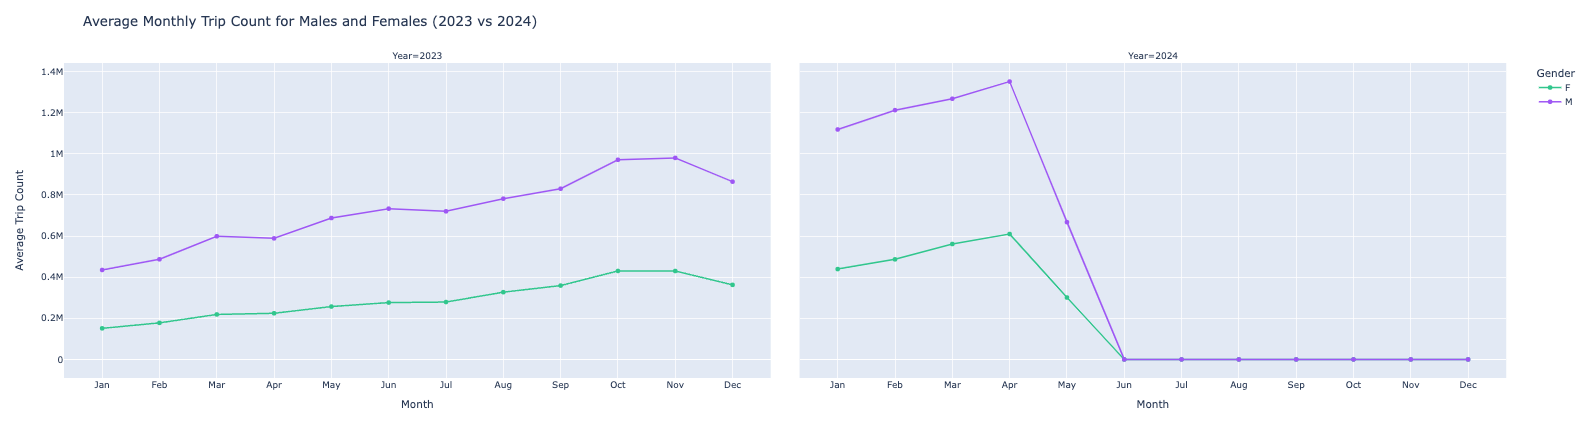

In [ ]:
# Group by 'Year', 'Month', and 'Age_Group' to calculate the average trip count for each month
avg_trip_count_by_age_month = combined_2023_2024.groupby(['Year', 'Month', 'Age_Group'])['Trip_ID'].count().reset_index(name='Trip Count')

# Calculate the average trip count for each month and age group
avg_trip_count_by_age_month = avg_trip_count_by_age_month.groupby(['Year', 'Month', 'Age_Group'])['Trip Count'].mean().reset_index()

# Define the color palette for age groups
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart using Plotly Express with month on the x-axis
fig = px.line(avg_trip_count_by_age_month, x='Month', y='Trip Count', color='Age_Group', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Monthly Trip Count by Age Group (2023 vs 2024)',
              labels={'Month': 'Month', 'Trip Count': 'Average Trip Count'},
              markers=True,  # Add markers to the lines
              color_discrete_sequence=colors)  # Specify the color sequence

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Month',
    yaxis_title='Average Trip Count'
)

# Update x-axis ticks to show month names
fig.update_xaxes(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
fig.show()

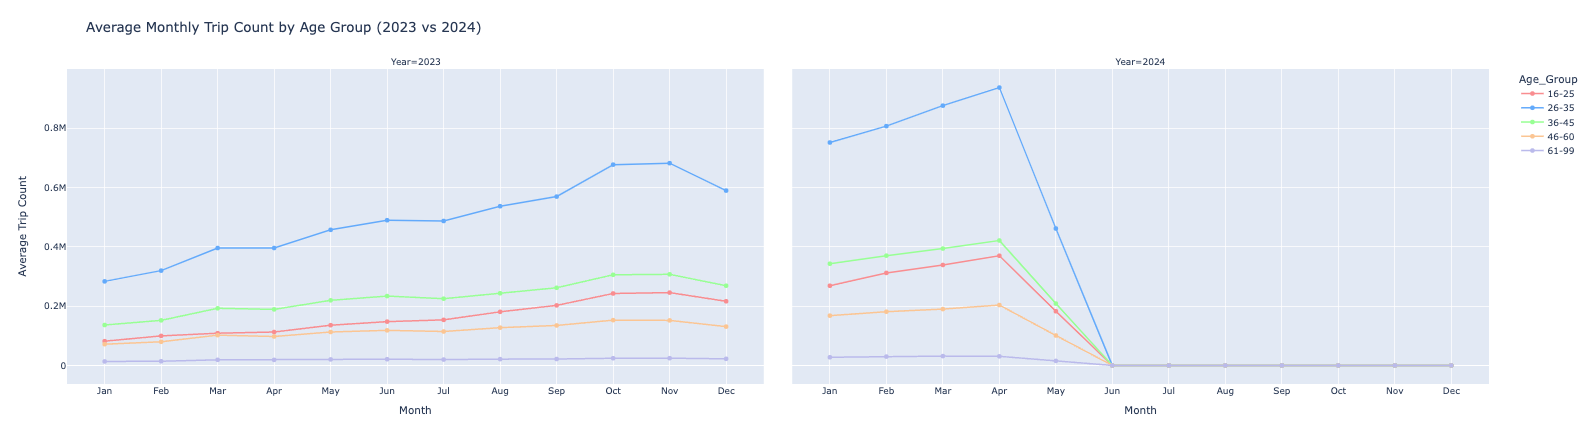

### Age range 26-35 lead with most trips each month
### 16-25 and 46-60 maintained close numbers jannuary - july 2023
### October and November were thh busiest months for all age ranges
### A steady increase from 2023-24 until May which shows a significant drop by all age ranges and genders

In [ ]:
# Group by 'Year', 'Month', and 'Gender' to calculate the average trip duration for each month
avg_trip_duration_by_gender_month = combined_2023_2024.groupby(['Year', 'Month', 'Gender'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Create a line chart using Plotly Express with month on the x-axis
fig = px.line(avg_trip_duration_by_gender_month, x='Month', y='Avg Trip Duration', color='Gender', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Monthly Trip Duration for Males and Females (2023 vs 2024)',
              labels={'Month': 'Month', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              color_discrete_map={'Male': 'blue', 'Female': 'pink'},  # Set colors for each gender
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Month',
    yaxis_title='Average Trip Duration (minutes)'
)

# Update x-axis ticks to show month names
fig.update_xaxes(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
fig.show()

# Group by 'Year', 'Month', and 'Age_Group' to calculate the average trip duration for each month
avg_trip_duration_by_age_month = combined_2023_2024.groupby(['Year', 'Month', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart using Plotly Express with month on the x-axis
fig = px.line(avg_trip_duration_by_age_month, x='Month', y='Avg Trip Duration', color='Age_Group', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Monthly Trip Duration by Age Group (2023 vs 2024)',
              labels={'Month': 'Month', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              color_discrete_sequence=colors,  # Set custom colors for each age group
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Month',
    yaxis_title='Average Trip Duration (minutes)'
)

# Update x-axis ticks to show month names
fig.update_xaxes(tickmode='array', tickvals=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                 ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Show the plot
fig.show()

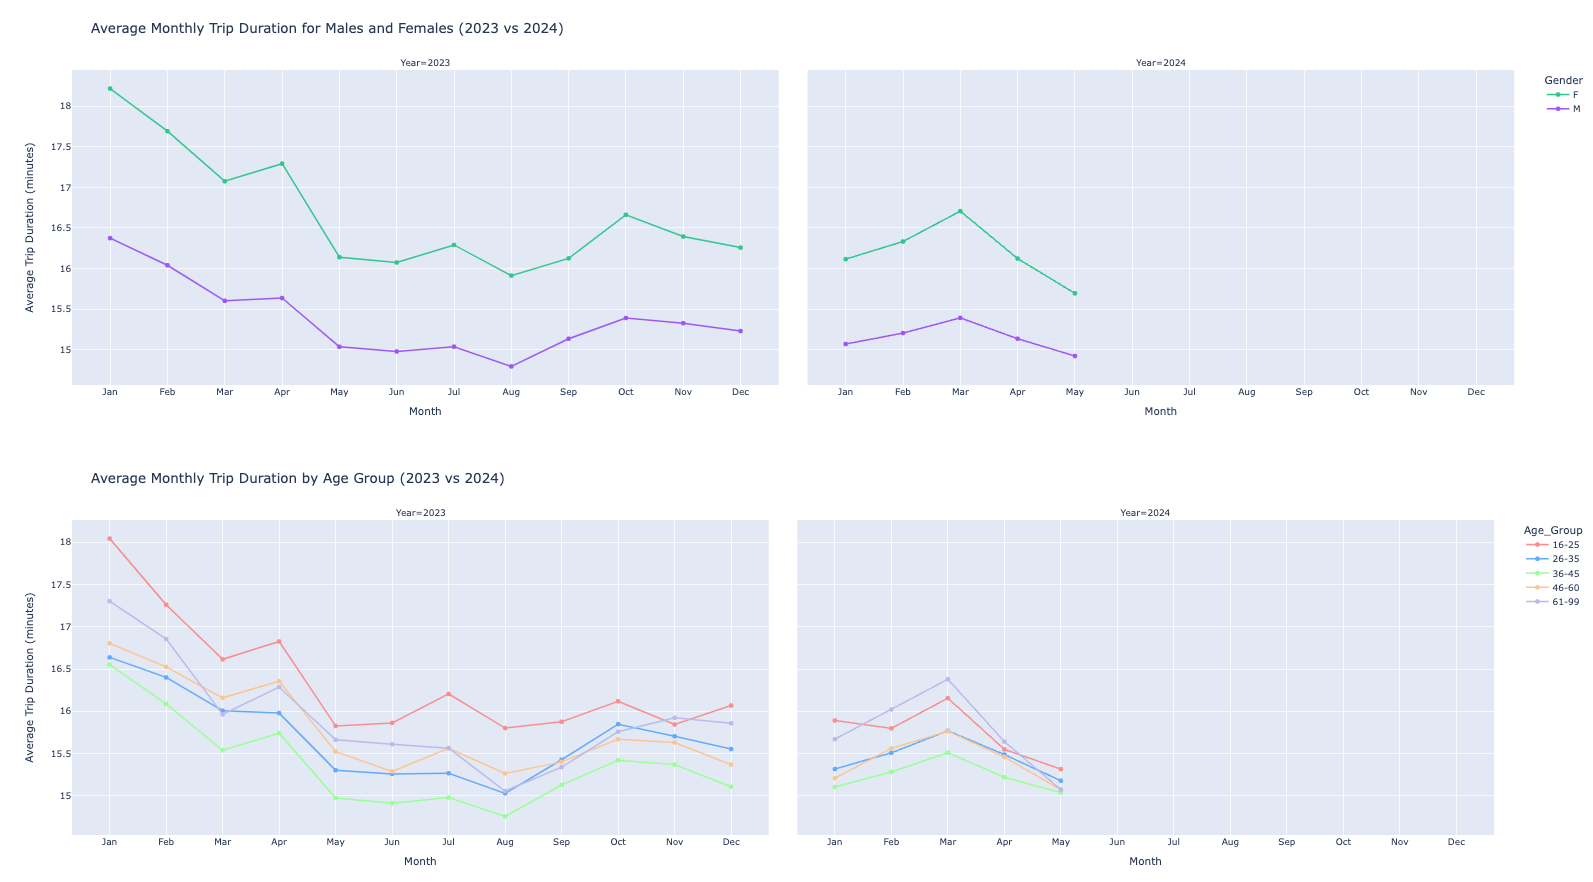

### Female trip duration noticeably higher than males for every single month 
### Age group 36-45 has the lowest average trip duration out of all age groups for both years
### Age group 26-35 also has lower trip durations
### Both age groups make up about 70% of rides yet they exhibit lower trip durations compared to the other age groups
### The youngest age group, 16-25 leads 2023 with the highest trip duration while the oldest 61-99 is the second highest group for trip duration
### 2024 also recorded age group 16-25 and 61-99 as the top age groups for highest trip durations
### May - August display months with the lowest trip duration

In [ ]:
# Define the custom color palette
colors = {'Male': 'blue', 'Female': 'pink'}  # Consistent colors for Gender

# Group by 'Age_Range', 'Gender', and calculate average trip duration
avg_trip_duration_by_age_gender = combined_2023_2024.groupby(['Age_Group', 'Gender'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Create a grouped bar chart using Plotly Express
fig = px.bar(avg_trip_duration_by_age_gender, x='Age_Group', y='Avg Trip Duration', color='Gender',
             title='Average Trip Duration by Age Range and Gender (2023 - 2024)',
             labels={'Age_Group': 'Age Range', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
             color_discrete_map=colors,  # Set colors for each gender
             barmode='group')  # Group bars by Gender

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Age Group',
    yaxis_title='Average Trip Duration (minutes)',
    legend_title='Gender'
)

# Show the plot
fig.show()

# Group by 'Age_Range' and 'Gender', then calculate the count of users in each group
gender_age_counts = combined_2023_2024.groupby(['Age_Group', 'Gender']).size().reset_index(name='Count')

# Pivot the data for the stacked bar chart
gender_age_pivot = gender_age_counts.pivot(index='Age_Group', columns='Gender', values='Count').fillna(0)

# Calculate the percentage of male and female users for each age group
gender_age_pivot['Male Percentage'] = 100 * gender_age_pivot['M'] / (gender_age_pivot['M'] + gender_age_pivot['F'])
gender_age_pivot['Female Percentage'] = 100 * gender_age_pivot['F'] / (gender_age_pivot['M'] + gender_age_pivot['F'])

# Convert the pivot table to long format for the stacked bar chart
gender_age_pivot_long = gender_age_pivot.reset_index().melt(id_vars='Age_Group', value_vars=['Male Percentage', 'Female Percentage'],
                                                           var_name='Gender', value_name='Percentage')

# Map the 'Gender' to actual gender labels
gender_age_pivot_long['Gender'] = gender_age_pivot_long['Gender'].map({'Male Percentage': 'Male', 'Female Percentage': 'Female'})

# Round the percentages to 1 decimal place
gender_age_pivot_long['Percentage'] = gender_age_pivot_long['Percentage'].round(1)

# Create the stacked bar chart
fig = px.bar(gender_age_pivot_long, x='Age_Group', y='Percentage', color='Gender',
             title='Percentage of Male and Female Users by Age Range (2023 - 2024)',
             labels={'Age_Group': 'Age Range', 'Percentage': 'Percentage (%)'},
             color_discrete_map=colors,  # Set colors for each gender
             text='Percentage',
             text_auto='%.1f%%')  # Show percentage on the bars

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Age Range',
    yaxis_title='Percentage (%)',
    legend_title='Gender'
)

# Show the plot
fig.show()

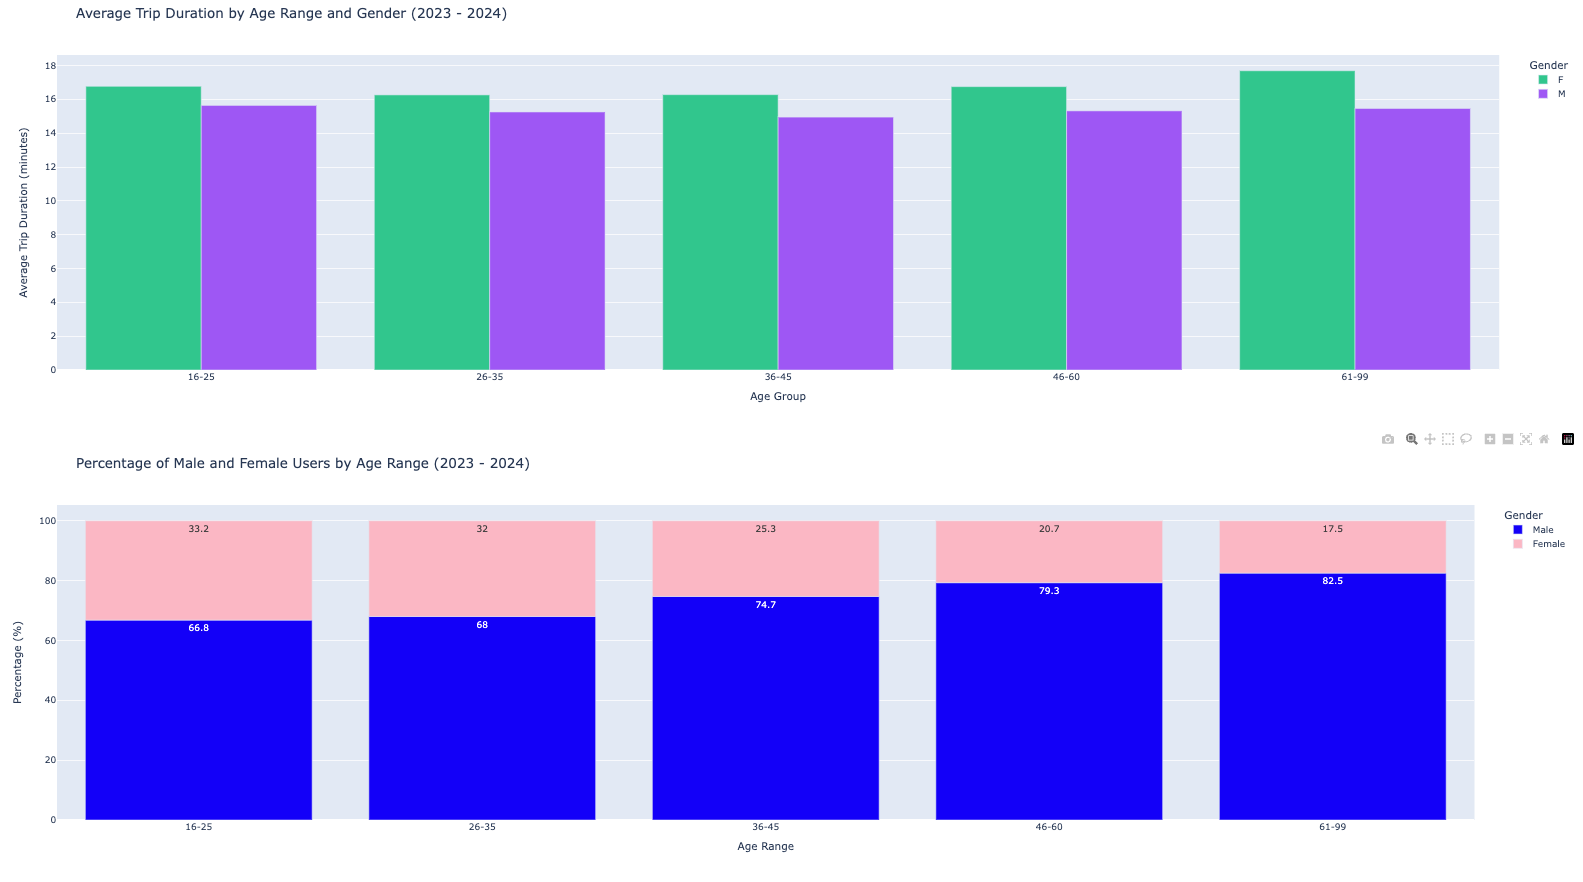

### Age range 61-99 has the highest trip duration for females yet it has the lowest percentage of females out of all other age ranges with 17.5 %
### The second highest female age range for trip duration is 46-60 which also has the second lowest percentage of 20.7% 
### It seem that besides the 16-25 age range, that the higher the age for females, the higher the average trip duration is

In [ ]:
# Group by 'Year', 'Month', and 'Gender' to calculate the average trip count for each month
avg_trip_count_by_gender_day = combined_2023_2024.groupby(['Year', 'Week_Day', 'Gender'])['Trip_ID'].count().reset_index(name='Trip Count')

# Calculate the average trip count for each month and gender
avg_trip_count_by_gender_day = avg_trip_count_by_gender_day.groupby(['Year', 'Week_Day', 'Gender'])['Trip Count'].mean().reset_index()

# Create a line chart using Plotly Express with month on the x-axis
fig = px.line(avg_trip_count_by_gender_day, x='Week_Day', y='Trip Count', color='Gender', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Daily Trip Count for Males and Females (2023 vs 2024)',
              labels={'Week_Day': 'Day', 'Trip Count': 'Average Trip Count'},
              color_discrete_map={'Male': 'blue', 'Female': 'pink'},  # Set colors for each gender
              markers=True,  # Add markers to the lines
              color_discrete_sequence=['pink', 'blue'])  # Specify the color sequence

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Day',
    yaxis_title='Average Trip Count'
)


# Show the plot
fig.show()

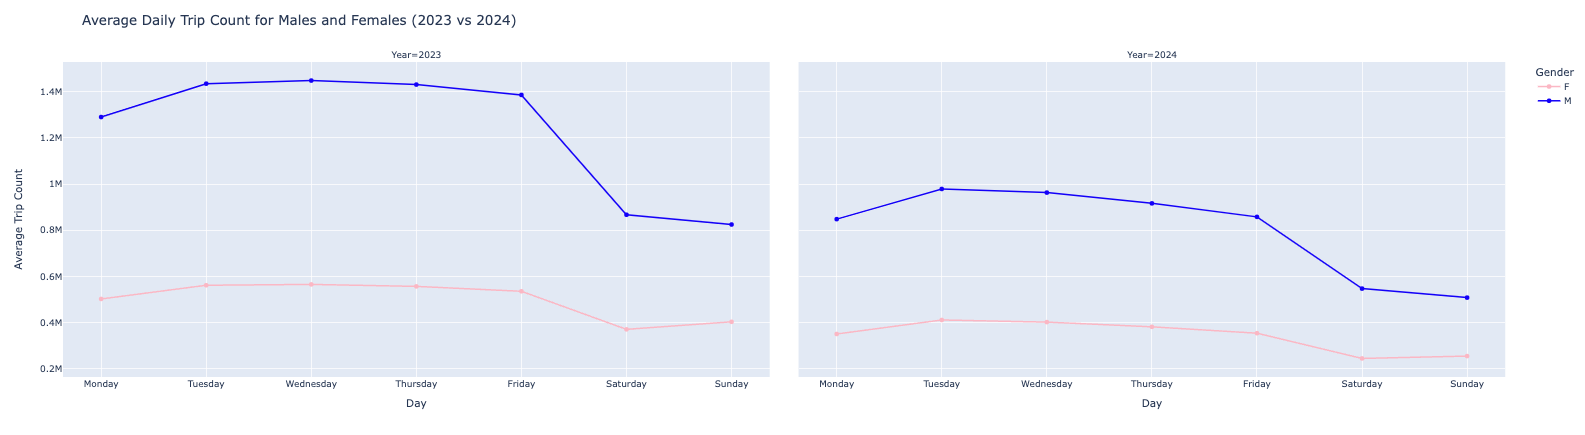

### For males, Sunday is the day with the least amount of trips taken
### While Females, Saturday is the least busiest day for bike usage

In [ ]:
# Group by 'Year', 'Month', and 'Age_Group' to calculate the average trip duration for each month
avg_trip_duration_by_age_day = combined_2023_2024.groupby(['Year', 'Week_Day', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart using Plotly Express with month on the x-axis
fig = px.line(avg_trip_duration_by_age_day, x='Week_Day', y='Avg Trip Duration', color='Age_Group', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Daily Trip Duration by Age Group (2023 vs 2024)',
              labels={'Week_Day': 'Day', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              color_discrete_sequence=colors,  # Set custom colors for each age group
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Day',
    yaxis_title='Average Trip Duration (minutes)'
)


# Show the plot
fig.show()

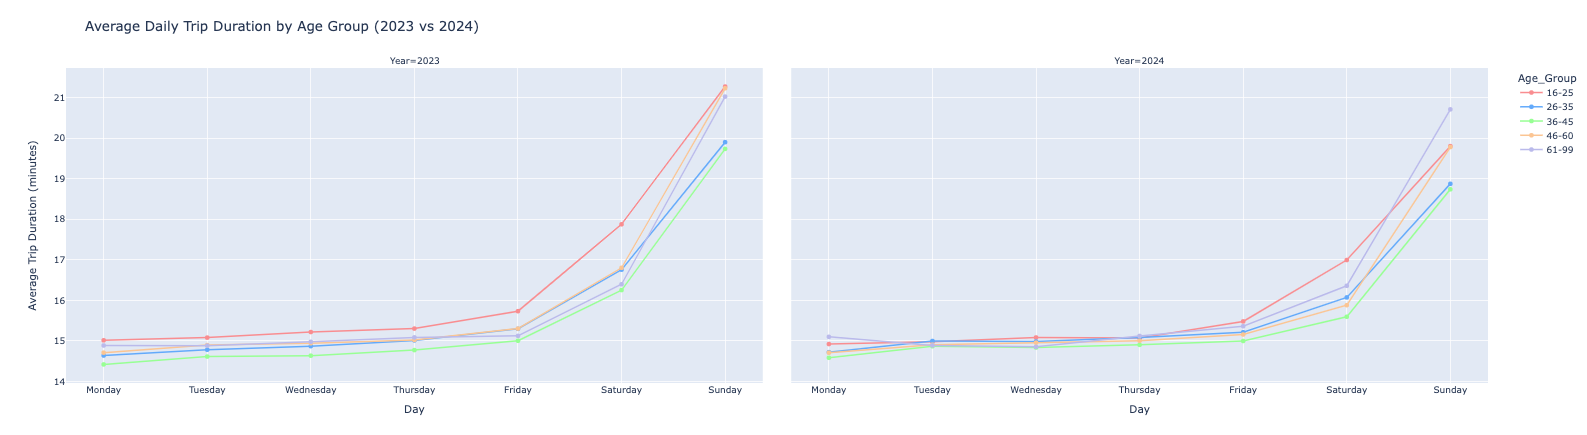

### Age Range 36-45 records the lowest trip duration for every single day
### Age Range 16-25 maintains the lead daily for 2023 while 2024 records different age groups to lead for different days 
### Sunday activity maintains similar behavior with age range 61-99 recording the highest trip duration
### Daily trip duration dropped from 2023 to 2024

In [ ]:
# Group by 'Year', 'Hour', and 'Gender' to calculate the trip count for each hour
avg_trip_count_by_gender_hour = combined_2023_2024.groupby(['Year', 'Hour', 'Gender'])['Trip_ID'].count().reset_index(name='Trip Count')

# Calculate the average trip count for each hour and gender
avg_trip_count_by_gender_hour = avg_trip_count_by_gender_hour.groupby(['Year', 'Hour', 'Gender'])['Trip Count'].mean().reset_index()

# Create a line chart using Plotly Express with hour on the x-axis
fig = px.line(avg_trip_count_by_gender_hour, x='Hour', y='Trip Count', color='Gender', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Hourly Trip Count for Males and Females (2023 vs 2024)',
              labels={'Hour': 'Hour', 'Trip Count': 'Average Trip Count'},
              color_discrete_map={'M': 'blue', 'F': 'pink'},  # Set colors for each gender
              markers=True)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Count'
)

# Show the plot
fig.show()

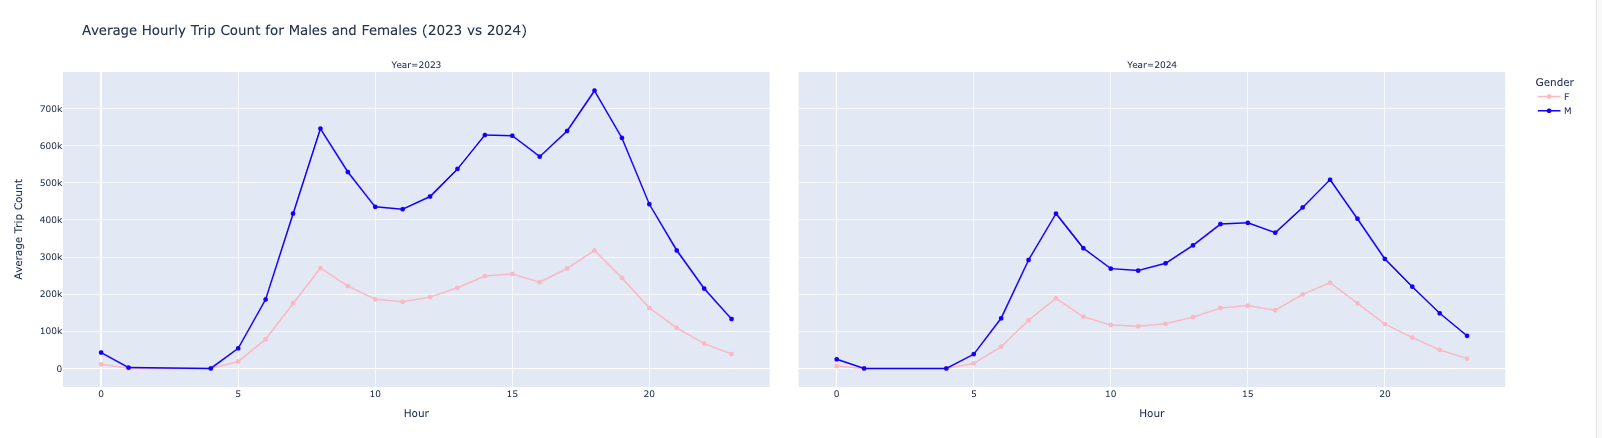

In [ ]:
# Group by 'Year', 'Hour', and 'Gender' to calculate the average trip duration for each hour
avg_trip_duration_by_gender_hour = combined_2023_2024.groupby(['Year', 'Hour', 'Gender'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Reindex to include all hours
avg_trip_duration_by_gender_hour = avg_trip_duration_by_gender_hour.set_index(['Year', 'Hour', 'Gender']).reset_index()

# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart using Plotly Express with hour on the x-axis
fig = px.line(avg_trip_duration_by_gender_hour, x='Hour', y='Avg Trip Duration', color='Gender', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Hourly Trip Duration by Gender (2023 vs 2024)',
              labels={'Hour': 'Hour', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              color_discrete_map={'M': 'blue', 'F': 'pink'},  # Set custom colors for each gender
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)'
)

# Update x-axes for both subplots to show all hours
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=1)
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=2)

# Show the plot
fig.show()

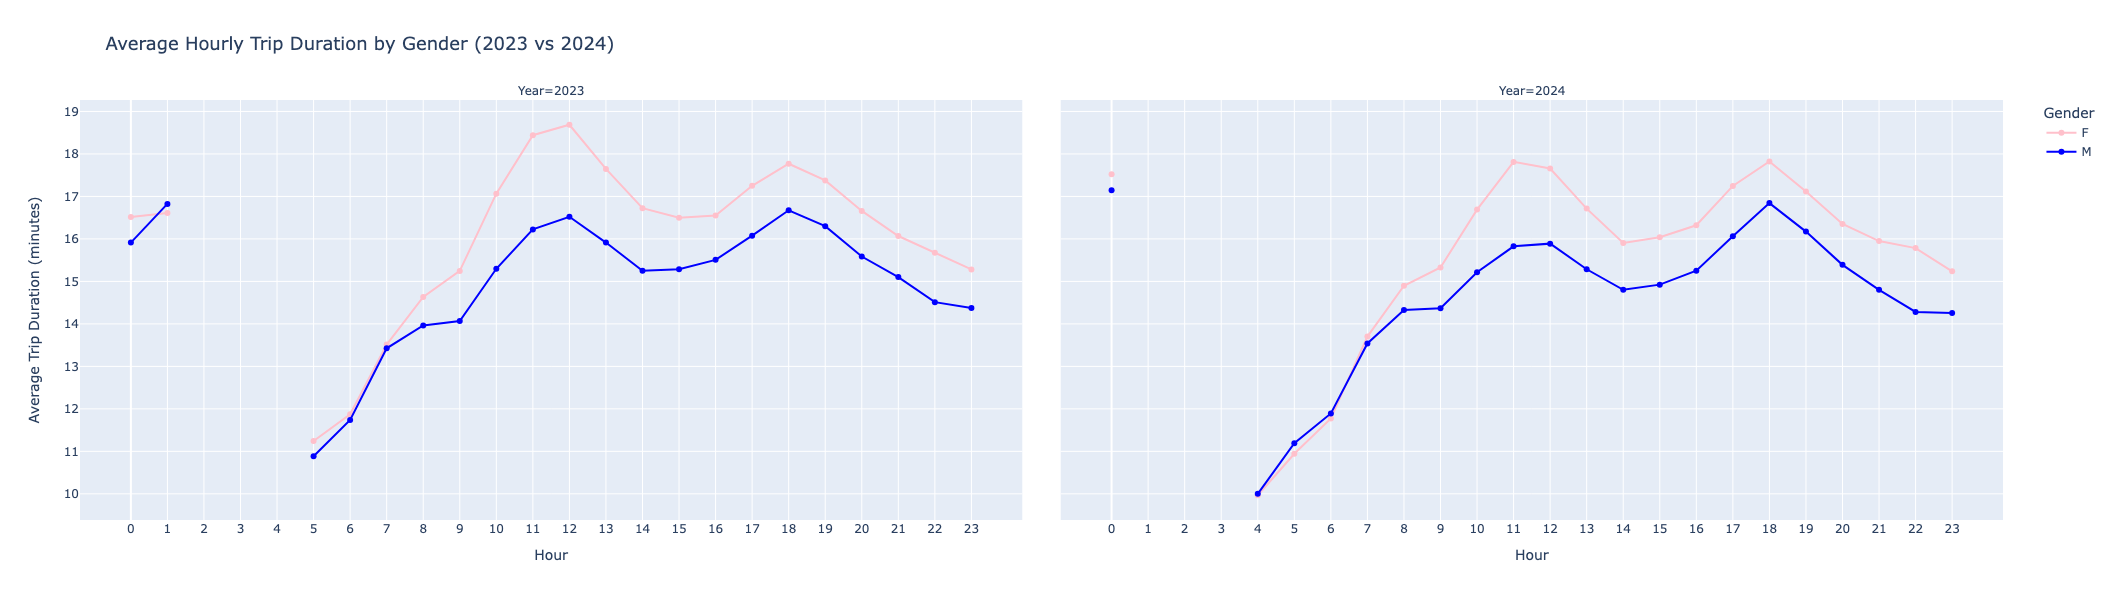

In [ ]:
# Group by 'Year', 'Hour', and 'Age_Group' to calculate the average trip duration for each month
avg_trip_duration_by_age_hour = combined_2023_2024.groupby(['Year', 'Hour', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Define the custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart using Plotly Express with month on the x-axis
fig = px.line(avg_trip_duration_by_age_hour, x='Hour', y='Avg Trip Duration', color='Age_Group', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Hourly Trip Duration by Age Group (2023 vs 2024)',
              labels={'Hour': 'Hour', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              color_discrete_sequence=colors,  # Set custom colors for each age group
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)'
)


# Update x-axes for both subplots to show all hours
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=1)
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=2)

# Show the plot
fig.show()

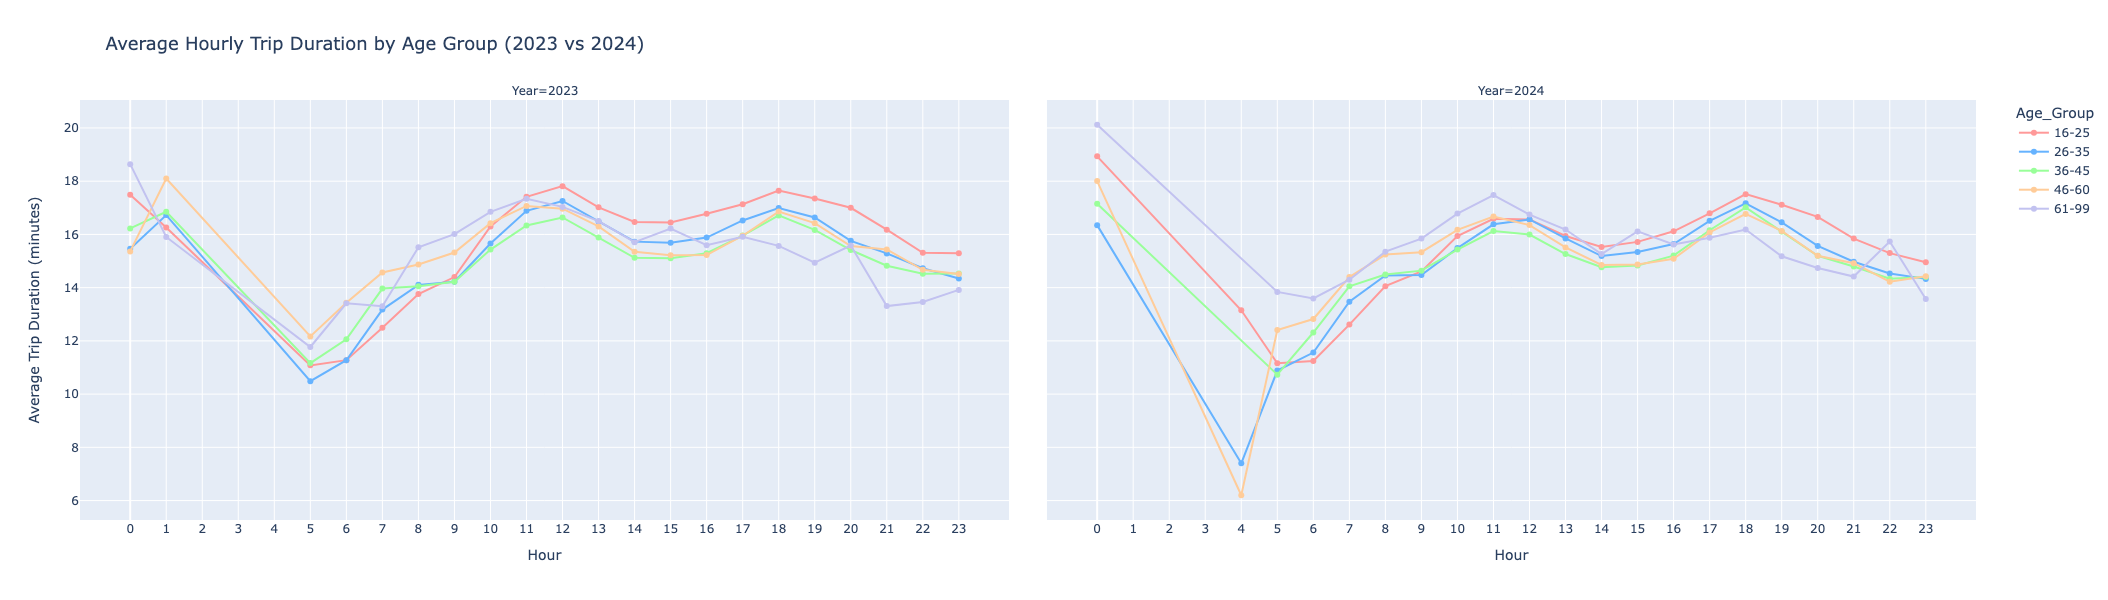

### While age group 61-99 showed  a stronger preference for higher trip durations 
### Daily and hourly data shows that trip duration is higher in the early hours of the day and drop to the lowest in the late hours of the night
### Trip duration start out lower for age range 16-25 but ends up being the highest for the late hours of the night 
### This suggests that older riders ride for shorter durations and younger riders use bikes for longer times during late hours of the night
### Early hours show that younger riders do not ride long durations while older riders do 

In [ ]:
# Calculate the trip count by hour for 2023
trip_stats_2023 = combined_2023.groupby('Hour').size().reset_index(name='Trip Count')

# Create a line plot for trip count by hour using Plotly Express
fig = px.line(
    trip_stats_2023, 
    x='Hour', 
    y='Trip Count', 
    title='Trip Count by Hour for 2023',
    labels={'Hour': 'Hour of the Day', 'Trip Count': 'Number of Trips'},
    markers=True
)

# Update the layout to make the graph more readable
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),  # Ensure all hours are shown on the x-axis
    height=500,  # Adjust height as needed
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

# Show the plot
fig.show()

# Calculate the trip count by hour for 2023
trip_stats_2024 = combined_2024.groupby('Hour').size().reset_index(name='Trip Count')

# Create a line plot for trip count by hour using Plotly Express
fig = px.line(
    trip_stats_2024, 
    x='Hour', 
    y='Trip Count', 
    title='Trip Count by Hour for 2024',
    labels={'Hour': 'Hour of the Day', 'Trip Count': 'Number of Trips'},
    markers=True
)

# Update the layout to make the graph more readable
fig.update_layout(
    xaxis=dict(tickmode='linear', dtick=1),  # Ensure all hours are shown on the x-axis
    height=500,  # Adjust height as needed
    title_font_size=16,
    xaxis_title_font_size=12,
    yaxis_title_font_size=12
)

# Show the plot
fig.show()

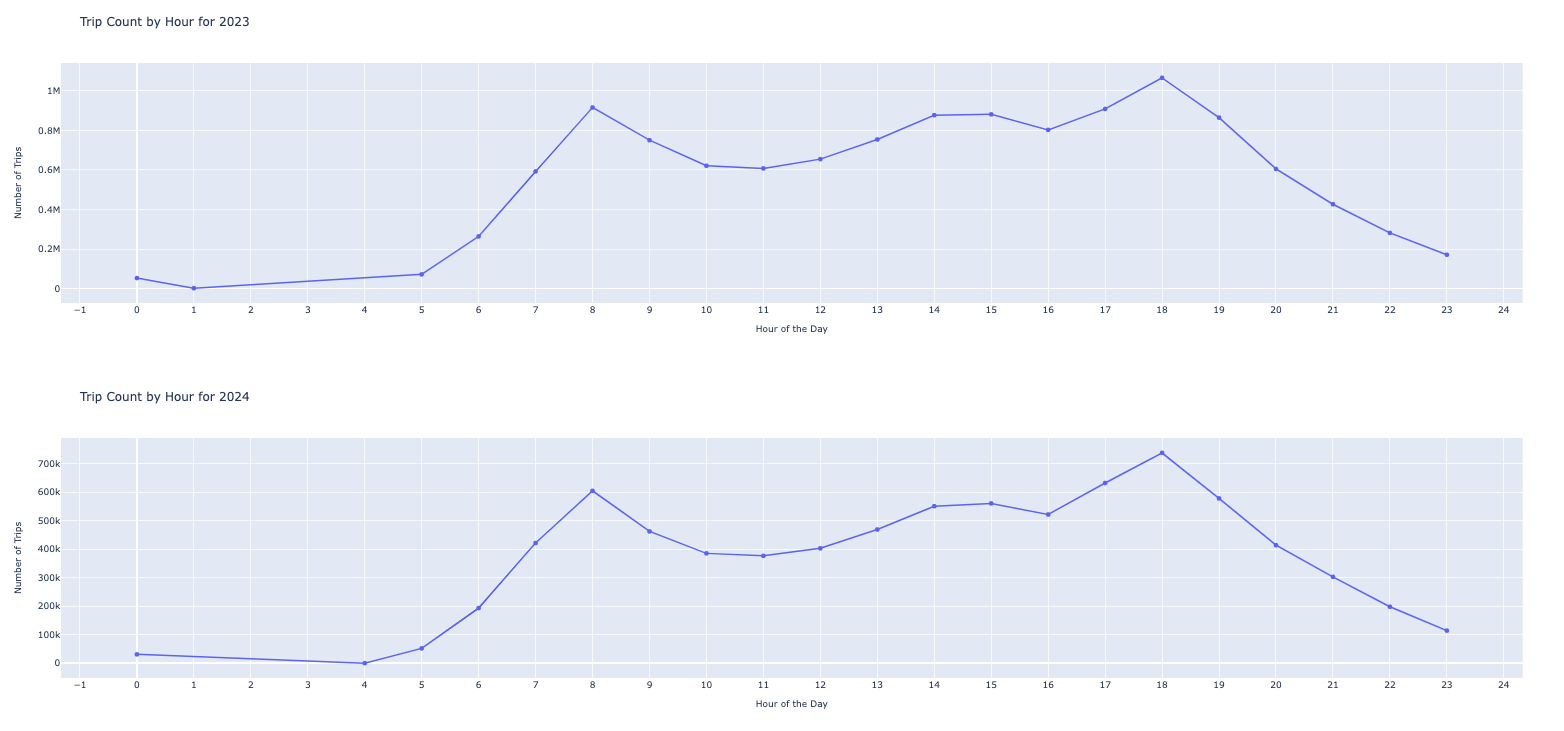

### A sharp rise in trip counts is observed starting from 6:00 AM, peaking around 8:00-9:00 AM.
### There is a secondary peak in the late afternoon around 17:00.
### Trip counts rise again in the evening, peaking at 18:00 for both years.
### 2023 sees a peak of 1,065,647 trips at 18:00, the highest count across all hours.
### 2024 has a peak of 738,808 trips at 18:00.
### The high number of trips during the morning hours aligns with the typical morning commute to work or school.
### The high number of trips during the evening hours corresponds to the typical end-of-workday period. This is known as the “evening rush hour.”

In [ ]:
# Group by 'Year' and 'Hour' to calculate the average trip duration for each hour
avg_trip_duration_by_hour = combined_2023_2024.groupby(['Year', 'Hour'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Define the custom color palette for Year
colors = ['#1f77b4', '#ff7f0e']  # Blue for 2023, Orange for 2024

# Create a line chart using Plotly Express with hour on the x-axis
fig = px.line(avg_trip_duration_by_hour, x='Hour', y='Avg Trip Duration',
              facet_col='Year',  # Create separate plots for each year
              title='Average Hourly Trip Duration (2023 vs 2024)',
              labels={'Hour': 'Hour', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              markers=True)  # Add markers to the lines

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)'
)

# Update x-axes for both subplots to show all hours
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=1)
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=2)

# Show the plot
fig.show()

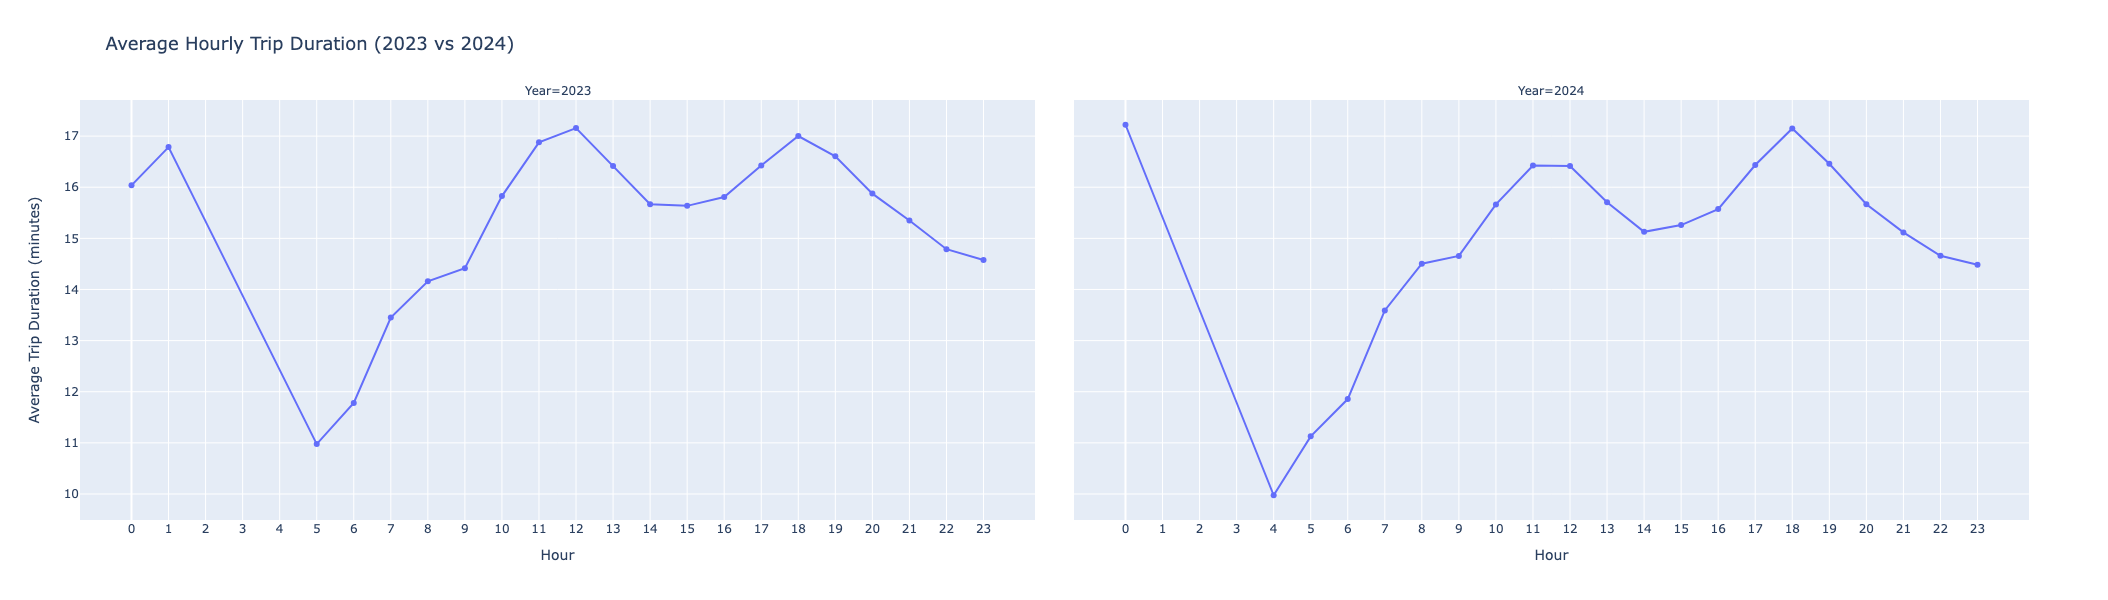

### 11am and 6pm show the the longest trip durations for both years

In [ ]:
# Filter for weekends (Saturday and Sunday)
weekend_data = combined_2023_2024[combined_2023_2024['Week_Day'].isin(['Saturday', 'Sunday'])]

# Group by 'Year', 'Hour', and 'Gender' to calculate the trip count for each hour
trip_count_by_gender_hour = weekend_data.groupby(['Year', 'Hour', 'Gender'])['Trip_ID'].count().reset_index(name='Trip Count')

# Create a line chart using Plotly Express with hour on the x-axis
fig = px.line(trip_count_by_gender_hour, x='Hour', y='Trip Count', color='Gender', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Hourly Trip Count for Males and Females on Weekends (2023 vs 2024)',
              labels={'Hour': 'Hour', 'Trip Count': 'Trip Count'},
              color_discrete_map={'M': 'blue', 'F': 'pink'},  # Set colors for each gender
              markers=True)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Trip Count',
    legend_title='Gender'  # Add a title to the legend
)

# Update x-axes for both subplots to show all hours
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=1)
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=2)

# Show the plot
fig.show()


# Group by 'Year', 'Hour', and 'Gender' to calculate the average trip duration for each hour
avg_trip_duration_by_gender_hour = weekend_data.groupby(['Year', 'Hour', 'Gender'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Create a line chart using Plotly Express with hour on the x-axis
fig = px.line(avg_trip_duration_by_gender_hour, x='Hour', y='Avg Trip Duration', color='Gender', 
              facet_col='Year',  # Create separate plots for each year
              title='Average Hourly Trip Duration for Males and Females on Weekends (2023 vs 2024)',
              labels={'Hour': 'Hour', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
              color_discrete_map={'M': 'blue', 'F': 'pink'},  # Set colors for each gender
              markers=True)

# Customize the layout
fig.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)',
    legend_title='Gender'  # Add a title to the legend
)

# Update x-axes for both subplots to show all hours
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=1)
fig.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=2)

# Show the plot
fig.show()

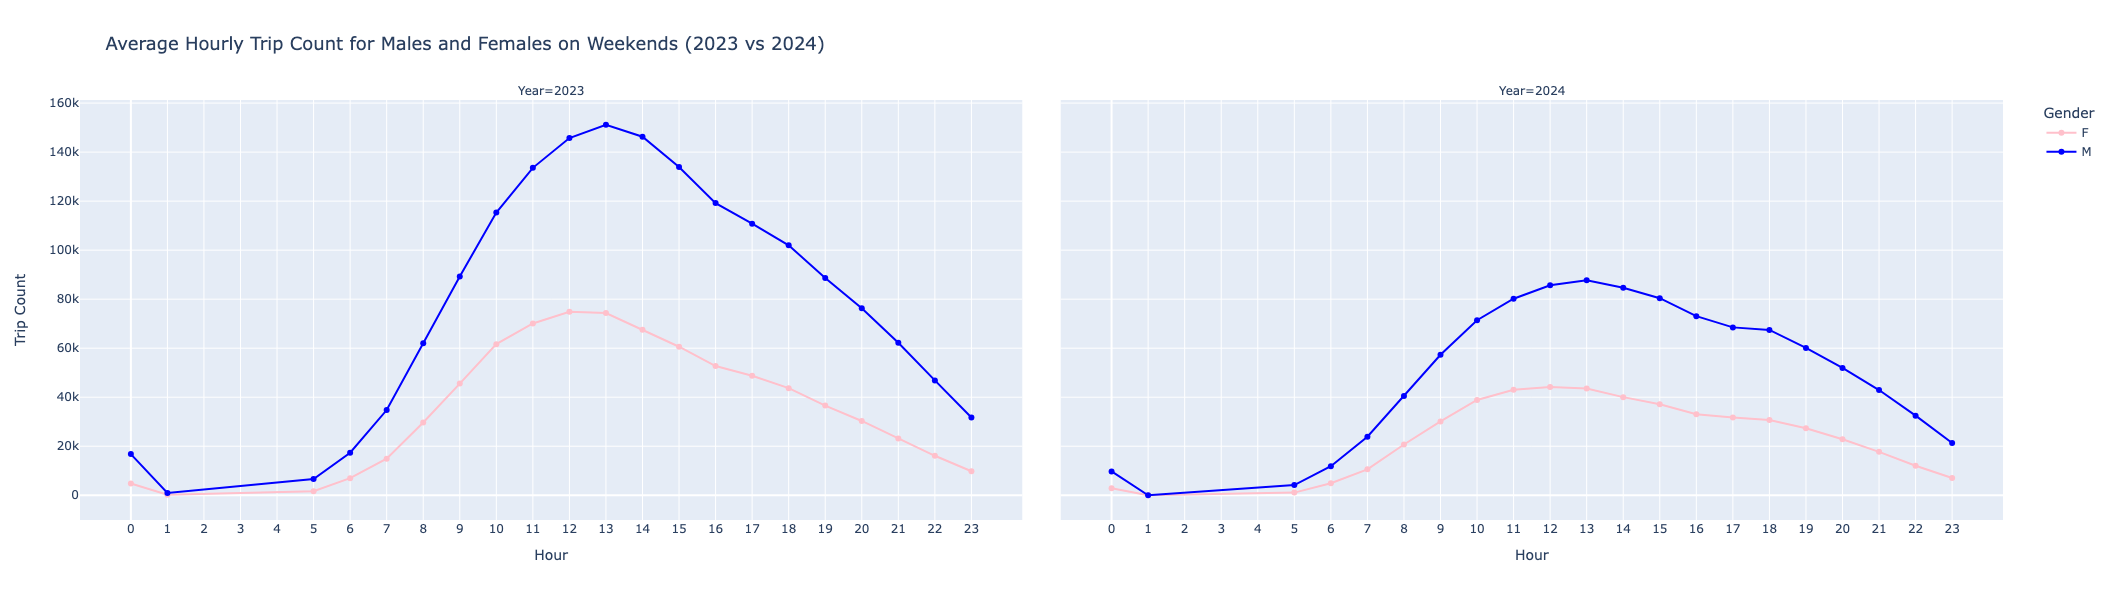

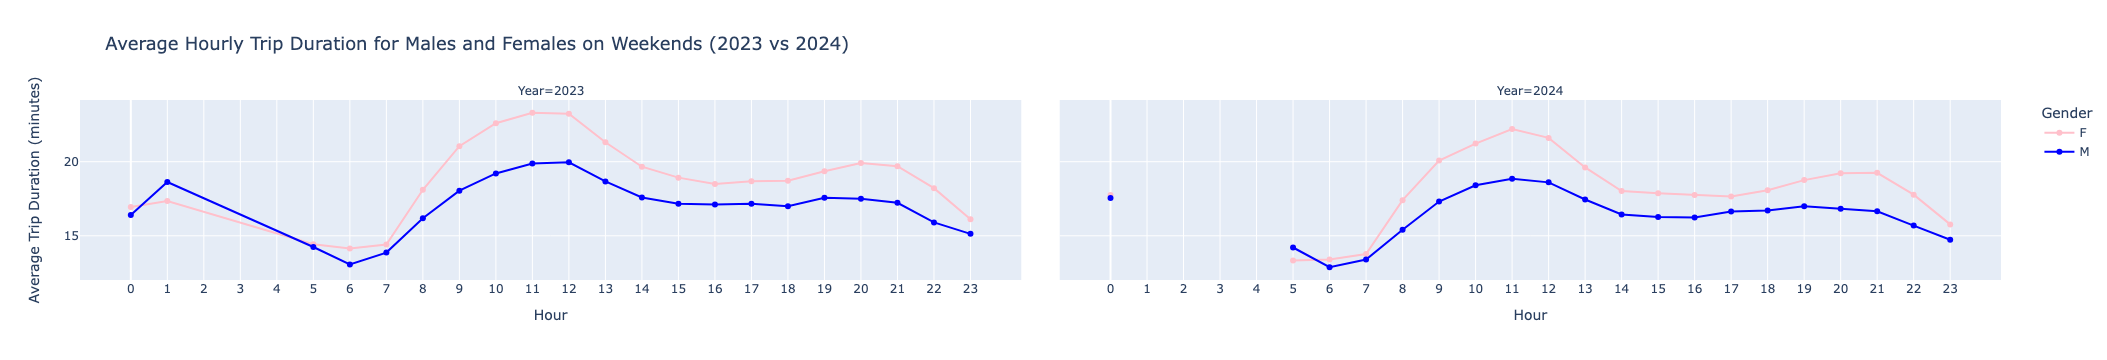

### Female trip count peaks at 1pm while females peak at 12pm for both 2023 and 2024
### Female trip duration peaks at 11am while male peaks at 12pm for 2023 and 11am for 2023
### There is spike between 20-21:00 for females and 19 for males
### Females mainting higher trip lenghts for every single hour over males but males exceed far more by amount of trips taken

In [ ]:
# Group by 'Year', 'Hour', and 'Age_Group' to calculate the trip count for each hour
trip_count_by_age_hour = weekend_data.groupby(['Year', 'Hour', 'Age_Group'])['Trip_ID'].count().reset_index(name='Trip Count')

# Create a line chart using Plotly Express with hour on the x-axis for trip count
fig1 = px.line(trip_count_by_age_hour, x='Hour', y='Trip Count', color='Age_Group', 
               facet_col='Year',  # Create separate plots for each year
               title='Hourly Trip Count by Age Group on Weekends (2023 vs 2024)',
               labels={'Hour': 'Hour', 'Trip Count': 'Trip Count'},
               color_discrete_sequence=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],  # Custom colors for each age group
               markers=True)  # Add markers to the lines

# Customize the layout for trip count
fig1.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Trip Count',
    legend_title='Age Group'  # Add a title to the legend
)

# Update x-axes for both subplots to show all hours
fig1.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=1)
fig1.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=2)

# Show the trip count plot
fig1.show()


# Group by 'Year', 'Hour', and 'Age_Group' to calculate the average trip duration for each hour
avg_trip_duration_by_age_hour = weekend_data.groupby(['Year', 'Hour', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Create a line chart using Plotly Express with hour on the x-axis for average trip duration
fig2 = px.line(avg_trip_duration_by_age_hour, x='Hour', y='Avg Trip Duration', color='Age_Group', 
               facet_col='Year',  # Create separate plots for each year
               title='Average Hourly Trip Duration by Age Group on Weekends (2023 vs 2024)',
               labels={'Hour': 'Hour', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
               color_discrete_sequence=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'],  # Custom colors for each age group
               markers=True)  # Add markers to the lines

# Customize the layout for average trip duration
fig2.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)',
    legend_title='Age Group'  # Add a title to the legend
)

# Update x-axes for both subplots to show all hours
fig2.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=1)
fig2.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)), row=1, col=2)

# Show the average trip duration plot
fig2.show()

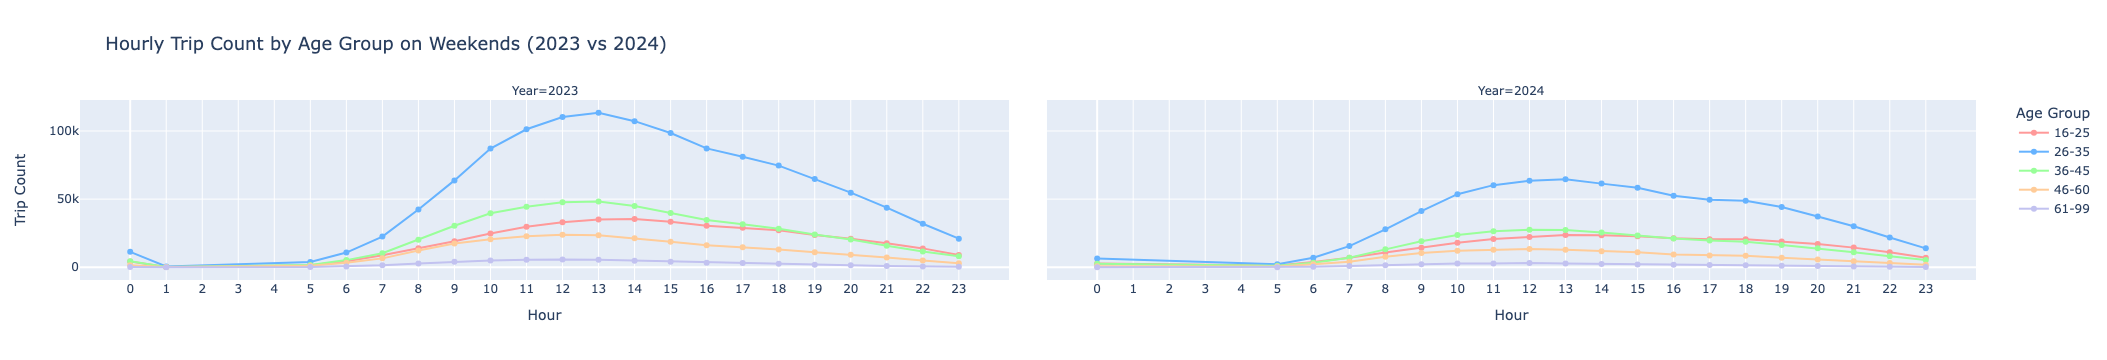

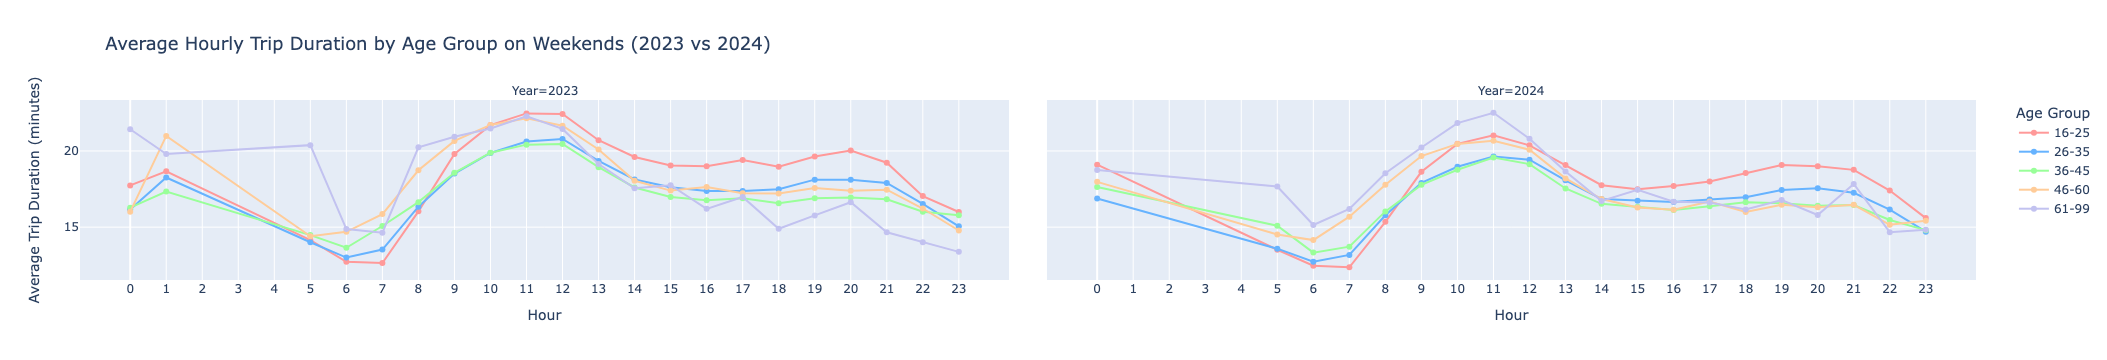

In [ ]:
# Group by 'Week_Day', 'Hour', and 'Age_Group' to calculate the average trip duration for each hour
avg_trip_duration_by_age_hour = weekend_data.groupby(['Week_Day', 'Hour', 'Age_Group'])['Trip_Duration'].mean().reset_index(name='Avg Trip Duration')

# Define a custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart for Saturday
fig_saturday = px.line(avg_trip_duration_by_age_hour[avg_trip_duration_by_age_hour['Week_Day'] == 'Saturday'], 
                      x='Hour', 
                      y='Avg Trip Duration', 
                      color='Age_Group',
                      title='Average Hourly Trip Duration by Age Group on Saturday (2023 - 2024)',
                      labels={'Hour': 'Hour', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
                      color_discrete_sequence=colors,  # Set custom colors for each age group
                      markers=True)

# Customize the layout for Saturday
fig_saturday.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=500,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)',
    legend_title='Age Group'  # Add a title to the legend
)

# Update x-axes for Saturday to show all hours
fig_saturday.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)))

# Show the Saturday trip duration plot
fig_saturday.show()

# Group by 'Week_Day', 'Hour', and 'Age_Group' to calculate the average trip duration for each hour
avg_trip_count_by_age_hour = weekend_data.groupby(['Week_Day', 'Hour', 'Age_Group'])['Trip_Duration'].size().reset_index(name='Avg Trip Count')

avg_trip_count_by_age_hour = avg_trip_count_by_age_hour.groupby(['Week_Day', 'Hour', 'Age_Group'])['Avg Trip Count'].mean().reset_index()

# Define a custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart for Saturday
fig_saturday = px.line(avg_trip_count_by_age_hour[avg_trip_count_by_age_hour['Week_Day'] == 'Saturday'], 
                      x='Hour', 
                      y='Avg Trip Count', 
                      color='Age_Group',
                      title='Average Hourly Trip Count by Age Group on Saturday (2023 - 2024)',
                      labels={'Hour': 'Hour', 'Avg Trip Count': 'Average Trip Count'},
                      color_discrete_sequence=colors,  # Set custom colors for each age group
                      markers=True)

# Customize the layout for Saturday
fig_saturday.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=500,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Count',
    legend_title='Age Group'  # Add a title to the legend
)

# Update x-axes for Saturday to show all hours
fig_saturday.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)))

# Show the Saturday trip duration plot
fig_saturday.show()

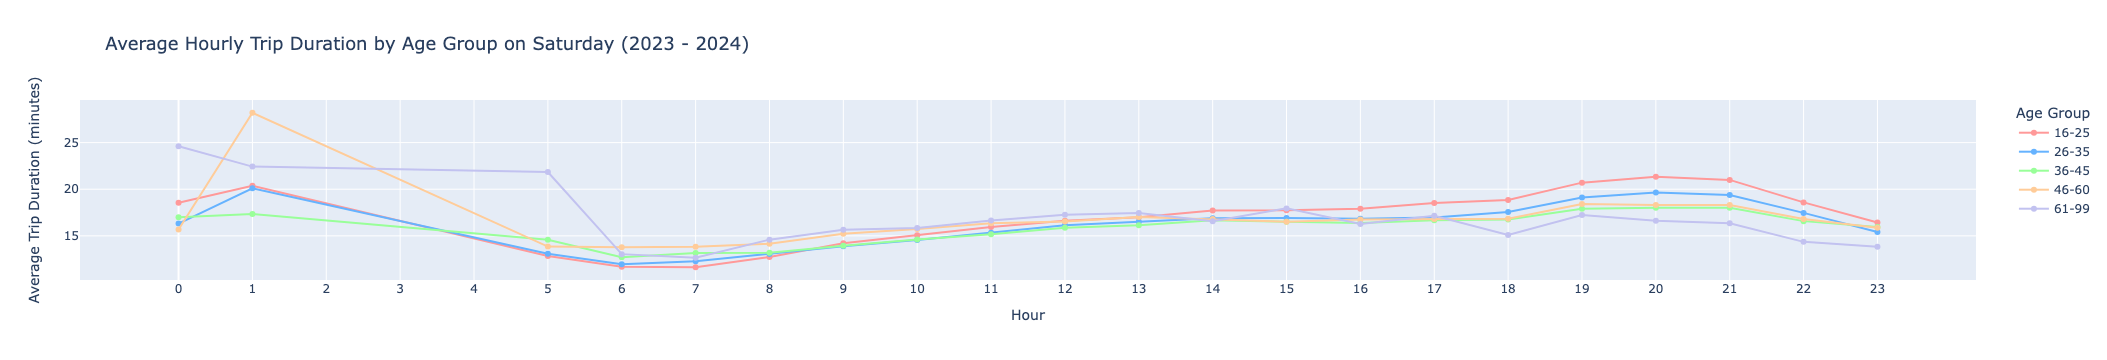

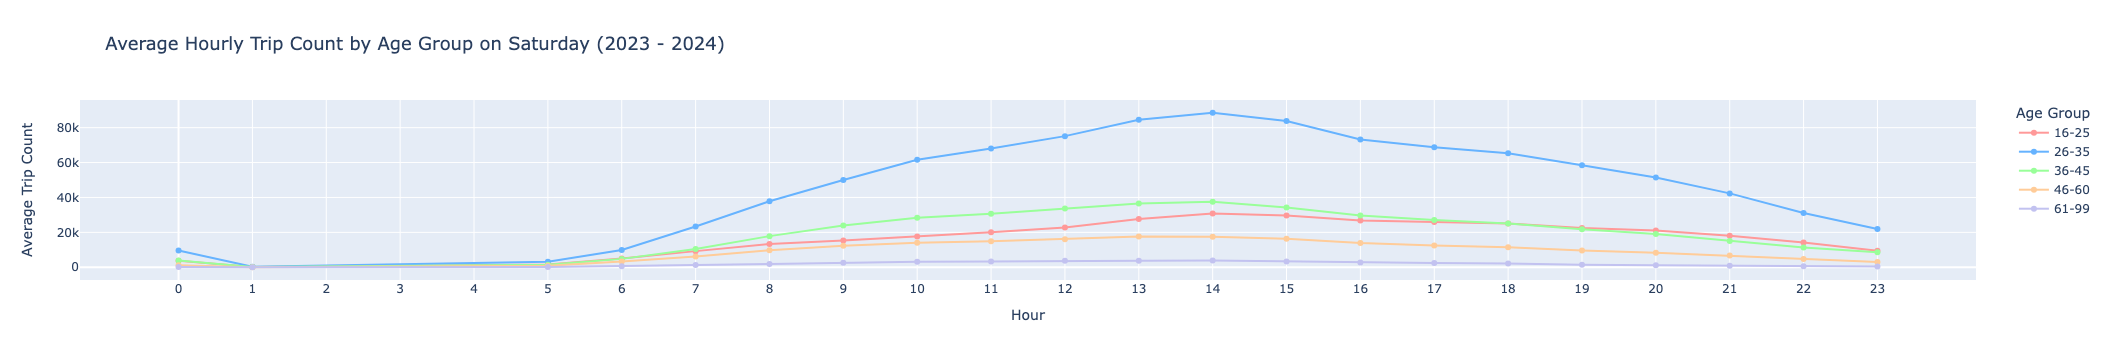

### Saturday activity shows increase in trip duration starting at 7am with age group 61-99 recording the highest trip duration until 13:00 then a gradual decrease
### 16-25 starts the day with the lowest trip duration but finishes with the highest since 16:00
### As time progresses, trip duration increases until 20:00 for all age groups except for 61-99
### Trip counts take off at 5am and increase 2pm with a gradual decrease followed after
### Saturday shows that age group 26-35 records the most trips followed by 36-45 and then 16-25

In [ ]:
# Create a line chart for Sunday
fig_sunday = px.line(avg_trip_duration_by_age_hour[avg_trip_duration_by_age_hour['Week_Day'] == 'Sunday'], 
                     x='Hour', 
                     y='Avg Trip Duration', 
                     color='Age_Group',
                     title='Average Hourly Trip Duration by Age Group on Sunday (2023 - 2024)',
                     labels={'Hour': 'Hour', 'Avg Trip Duration': 'Average Trip Duration (minutes)'},
                     color_discrete_sequence=colors,  # Set custom colors for each age group
                     markers=True)

# Customize the layout for Sunday
fig_sunday.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=500,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)',
    legend_title='Age Group'  # Add a title to the legend
)

# Update x-axes for Sunday to show all hours
fig_sunday.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)))

# Show the Sunday trip duration plot
fig_sunday.show()

# Group by 'Week_Day', 'Hour', and 'Age_Group' to calculate the average trip duration for each hour
avg_trip_count_by_age_hour = weekend_data.groupby(['Week_Day', 'Hour', 'Age_Group'])['Trip_Duration'].size().reset_index(name='Avg Trip Count')

avg_trip_count_by_age_hour = avg_trip_count_by_age_hour.groupby(['Week_Day', 'Hour', 'Age_Group'])['Avg Trip Count'].mean().reset_index()

# Define a custom color palette for Age_Group
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create a line chart for Saturday
fig_saturday = px.line(avg_trip_count_by_age_hour[avg_trip_count_by_age_hour['Week_Day'] == 'Sunday'], 
                      x='Hour', 
                      y='Avg Trip Count', 
                      color='Age_Group',
                      title='Average Hourly Trip Count by Age Group on Sunday (2023 - 2024)',
                      labels={'Hour': 'Hour', 'Avg Trip Count': 'Average Trip Count'},
                      color_discrete_sequence=colors,  # Set custom colors for each age group
                      markers=True)

# Customize the layout for Saturday
fig_saturday.update_layout(
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=500,  # Set the desired height
    xaxis_title='Hour',
    yaxis_title='Average Trip Duration (minutes)',
    legend_title='Age Group'  # Add a title to the legend
)

# Update x-axes for Saturday to show all hours
fig_saturday.update_xaxes(dtick=1, tickmode='array', tickvals=list(range(24)))

# Show the Saturday trip duration plot
fig_saturday.show()

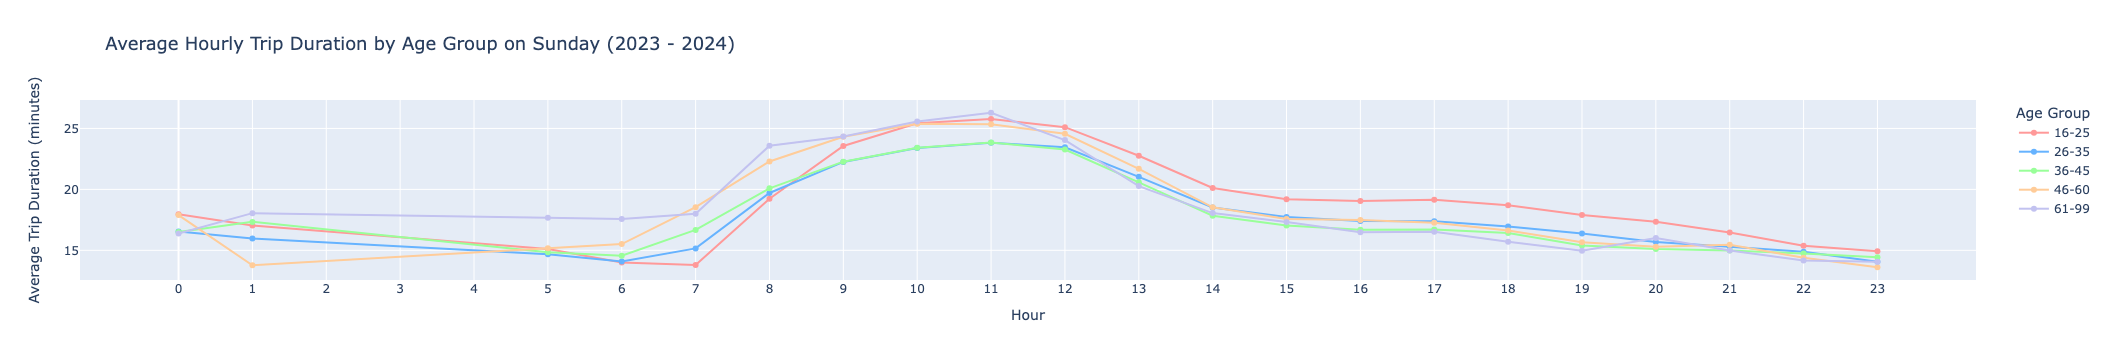

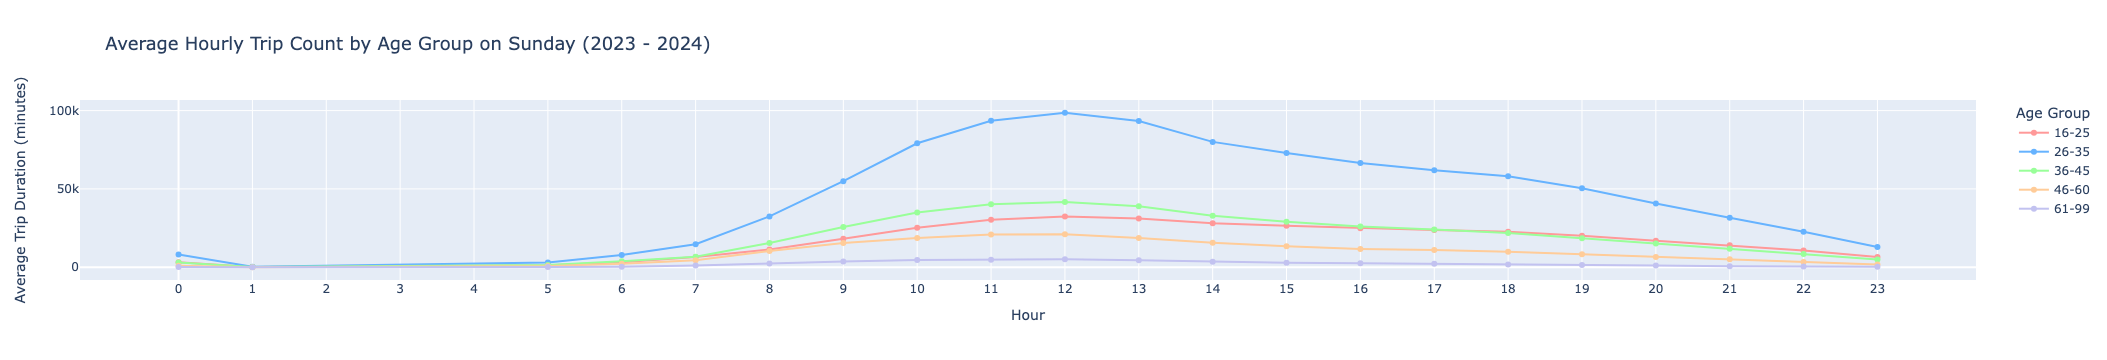

## The peak hours for both genders are from 6 AM to 9 AM and from 4 PM to 7 PM, coinciding with typical commuting times.
### The 26-35 age group consistently has the highest number of trips across almost all hours for both genders.
### The second highest is generally the 16-25 age group, followed by 36-45, 46-60, and finally, 61-99 age groups.
## Hourly Trends:
### Morning Peak (6 AM - 9 AM):
### A significant surge in trips starts at 6 AM, peaks at 8 AM, and begins to decline after 9 AM.
### The increase is sharp and the numbers are substantial, indicating a high level of commuting activity.
### Evening Peak (4 PM - 7 PM):
### There's another surge starting at 4 PM, peaking at around 6 PM, and gradually tapering off towards 7 PM.
### Off-Peak Hours (10 PM - 5 AM):
### There is a noticeable drop in trips during late night and early morning hours.
### Both genders show minimal activity during these hours, with the numbers significantly lower than peak times.

## Age Group Trends:
## 16-25 Age Group:
### Shows a high number of trips but not as high as the 26-35 age group.
### The numbers are consistent throughout the day but peak during commuting hours.
## 26-35 Age Group:
### Dominates in trip counts across all hours.
### Indicates that this age group is the most active in using the service.
## 36-45 Age Group:
### Has a moderate number of trips, with trends similar to the younger age groups.
### Peaks during commuting hours but lower in comparison to the 26-35 group.
## 46-60 and 61-99 Age Groups:
### Have the least number of trips.
### The difference between peak and off-peak hours is less pronounced compared to younger age groups.

## Commuting Patterns:

### The data strongly suggests that the majority of trips are taken during traditional commuting hours, with two significant peaks in the morning and evening.
### This pattern is consistent across all age groups and genders, emphasizing the service's role in daily commuting.
## Age and Gender Dynamics:

### The 26-35 age group is the most active, indicating a potential target demographic for marketing and service improvements.
### The higher trip numbers among males suggest a potential gender disparity in service usage, which could be explored further to understand underlying causes and address any gaps.
## Service Optimization:

### Given the high usage during peak hours, optimizing service availability and efficiency during these times could improve user experience.
### Off-peak hours show lower usage, indicating potential opportunities for promotions or incentives to balance the load and increase off-peak usage.
## Safety and Accessibility:
### The lower number of trips during late night hours suggests safety or accessibility concerns. Enhancing security and service reliability during these times might encourage more usage.